# Pollution Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV

In [2]:
polln=pd.read_csv('city_day.csv')
polln=polln[polln.City=='Delhi']
polln.Date=pd.to_datetime(polln.Date)
polln=polln[polln.Date<=pd.Timestamp('2019-12-31')]
polln

City       Date   PM2.5    PM10     NO    NO2     NOx     NH3     CO  \
10229  Delhi 2015-01-01  313.22  607.98  69.16  36.39  110.59   33.85  15.20   
10230  Delhi 2015-01-02  186.18  269.55  62.09  32.87   88.14   31.83   9.54   
10231  Delhi 2015-01-03   87.18  131.90  25.73  30.31   47.95   69.55  10.61   
10232  Delhi 2015-01-04  151.84  241.84  25.01  36.91   48.62  130.36  11.54   
10233  Delhi 2015-01-05  146.60  219.13  14.01  34.92   38.25  122.88   9.20   
...      ...        ...     ...     ...    ...    ...     ...     ...    ...   
12050  Delhi 2019-12-27  240.07  371.45  28.66  54.60   54.95   52.64   1.39   
12051  Delhi 2019-12-28  275.60  426.12  60.13  55.98   83.47   50.47   1.96   
12052  Delhi 2019-12-29  326.79  500.15  32.73  57.76   61.51   49.61   1.86   
12053  Delhi 2019-12-30  333.43  486.35  54.97  55.61   79.04   50.75   2.24   
12054  Delhi 2019-12-31  245.53  338.18  44.49  47.50   64.57   48.22   1.80   

         SO2     O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
10229   9.25  41.68    14.36    24.86    9.84  472.0     Severe  
10230   6.65  29.97    10.55    20.09    4.29  454.0     Severe  
10231   2.65  19.71     3.91    10.23    1.99  143.0   Moderate  
10232   4.63  25.36     4.26     9.71    3.34  319.0  Very Poor  
10233   3.33  23.20     2.80     6.21    2.96  325.0  Very Poor  
...      ...    ...      ...      ...     ...    ...        ...  
12050   7.88  27.55     4.62    32.86    0.20  372.0  Very Poor  
12051  10.26  27.92     6.70    39.22    0.40  425.0     Severe  
12052  10.25  35.11     6.28    33.00    0.34  455.0     Severe  
12053  11.15  26.44     8.00    47.12    0.72  506.0     Severe  
12054  11.03  28.07     4.81    38.40    0.22  417.0     Severe  

[1826 rows x 16 columns]

In [3]:
polln=polln.drop('City',axis=1)
polln.iloc[:,1:].describe()

PM2.5         PM10           NO          NO2          NOx  \
count  1824.000000  1749.000000  1824.000000  1824.000000  1826.000000   
mean    120.896102   240.737662    40.620291    52.549309    60.544009   
std      84.276088   122.882885    33.841685    22.662034    38.036289   
min      10.240000    18.590000     3.570000    10.630000     0.000000   
25%      59.827500   143.970000    17.392500    34.980000    33.585000   
50%      97.750000   226.740000    28.875000    49.255000    54.545000   
75%     159.842500   319.970000    53.455000    65.005000    77.647500   
max     685.360000   796.880000   221.030000   162.500000   254.800000   

               NH3           CO          SO2           O3      Benzene  \
count  1817.000000  1826.000000  1716.000000  1742.000000  1826.000000   
mean     42.791833     2.068083    16.113351    52.444902     3.629650   
std      17.825838     2.664679     8.287396    26.883972     2.486212   
min       6.780000     0.000000     2.340000     6.940000     0.000000   
25%      31.570000     0.940000    10.125000    33.800000     1.902500   
50%      39.050000     1.290000    14.635000    45.200000     3.045000   
75%      49.840000     1.930000    20.150000    62.392500     4.790000   
max     166.700000    30.440000    71.560000   257.730000    20.640000   

           Toluene       Xylene          AQI  
count  1826.000000  1045.000000  1816.000000  
mean     16.921720     1.538306   267.329295  
std      15.656309     2.505001   119.308340  
min       0.000000     0.000000    29.000000  
25%       6.260000     0.110000   174.000000  
50%      12.090000     0.700000   267.000000  
75%      22.847500     2.070000   352.250000  
max     103.000000    23.300000   716.000000

In [4]:
polln

Date   PM2.5    PM10     NO    NO2     NOx     NH3     CO    SO2  \
10229 2015-01-01  313.22  607.98  69.16  36.39  110.59   33.85  15.20   9.25   
10230 2015-01-02  186.18  269.55  62.09  32.87   88.14   31.83   9.54   6.65   
10231 2015-01-03   87.18  131.90  25.73  30.31   47.95   69.55  10.61   2.65   
10232 2015-01-04  151.84  241.84  25.01  36.91   48.62  130.36  11.54   4.63   
10233 2015-01-05  146.60  219.13  14.01  34.92   38.25  122.88   9.20   3.33   
...          ...     ...     ...    ...    ...     ...     ...    ...    ...   
12050 2019-12-27  240.07  371.45  28.66  54.60   54.95   52.64   1.39   7.88   
12051 2019-12-28  275.60  426.12  60.13  55.98   83.47   50.47   1.96  10.26   
12052 2019-12-29  326.79  500.15  32.73  57.76   61.51   49.61   1.86  10.25   
12053 2019-12-30  333.43  486.35  54.97  55.61   79.04   50.75   2.24  11.15   
12054 2019-12-31  245.53  338.18  44.49  47.50   64.57   48.22   1.80  11.03   

          O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
10229  41.68    14.36    24.86    9.84  472.0     Severe  
10230  29.97    10.55    20.09    4.29  454.0     Severe  
10231  19.71     3.91    10.23    1.99  143.0   Moderate  
10232  25.36     4.26     9.71    3.34  319.0  Very Poor  
10233  23.20     2.80     6.21    2.96  325.0  Very Poor  
...      ...      ...      ...     ...    ...        ...  
12050  27.55     4.62    32.86    0.20  372.0  Very Poor  
12051  27.92     6.70    39.22    0.40  425.0     Severe  
12052  35.11     6.28    33.00    0.34  455.0     Severe  
12053  26.44     8.00    47.12    0.72  506.0     Severe  
12054  28.07     4.81    38.40    0.22  417.0     Severe  

[1826 rows x 15 columns]

## 1 . CLEANING

### 1.1 . NULL VALUES

In [5]:
polln.isnull().sum()

Date            0
PM2.5           2
PM10           77
NO              2
NO2             2
NOx             0
NH3             9
CO              0
SO2           110
O3             84
Benzene         0
Toluene         0
Xylene        781
AQI            10
AQI_Bucket     10
dtype: int64

In [6]:
polln['AQI_Bucket'].unique()

array(['Severe', 'Moderate', 'Very Poor', 'Poor', 'Satisfactory', nan,
       'Good'], dtype=object)

In [7]:
polln[polln.AQI_Bucket.isnull()]

Date  PM2.5    PM10     NO     NO2    NOx    NH3    CO   SO2  \
10799 2016-07-24  59.40  124.47  15.95   56.56  69.20  38.44  1.45  8.91   
11133 2017-06-23  44.08  160.22  39.17  103.29   7.45  52.73  0.00   NaN   
11184 2017-08-13    NaN     NaN    NaN     NaN   0.00    NaN  0.00   NaN   
11185 2017-08-14  26.54     NaN  27.43   88.07   6.42  34.80  0.00   NaN   
11193 2017-08-22  46.00     NaN  14.50   38.70   0.25  15.50  0.00   NaN   
11194 2017-08-23  36.54     NaN  31.42   43.43   4.70  22.33  0.00   NaN   
11197 2017-08-26  62.33     NaN  40.14   37.65   2.06  23.26  0.00   NaN   
11198 2017-08-27  34.30     NaN  62.68   34.06   4.55  29.19  0.00   NaN   
11199 2017-08-28  23.82     NaN  20.79   27.89   2.43  15.60  0.00  2.34   
11200 2017-08-29  15.23     NaN  22.97   69.80   4.74  27.77  0.00   NaN   

          O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
10799  65.42     2.97     9.41     NaN  NaN        NaN  
11133    NaN     0.38     0.00     NaN  NaN        NaN  
11184    NaN     0.00     0.00     NaN  NaN        NaN  
11185    NaN     0.07     0.00     NaN  NaN        NaN  
11193    NaN     0.30     0.00     NaN  NaN        NaN  
11194    NaN     0.31     0.00     NaN  NaN        NaN  
11197    NaN     0.24     0.00     NaN  NaN        NaN  
11198    NaN     0.23     0.00     NaN  NaN        NaN  
11199  13.61     0.19     0.25     NaN  NaN        NaN  
11200    NaN     0.18     0.00     NaN  NaN        NaN

In [8]:
def NoNull(data,col):
    data[col]=np.where(data[col].isnull(),data[col].mean(),data[col])

In [9]:
for i in polln.iloc[:,1:14]:
    NoNull(polln,i)

In [10]:
polln=polln.reset_index(drop=True)

In [11]:
categories = [0, 50, 100, 200, 300, 400, float('inf')]
labels = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']

In [12]:
polln['AQI_Bucket'] = pd.cut(polln['AQI'], bins=categories, labels=labels)

### 1.2 . MISSING VALUES/OUTLIERS

In [13]:
polln

Date   PM2.5    PM10     NO    NO2     NOx     NH3     CO    SO2  \
0    2015-01-01  313.22  607.98  69.16  36.39  110.59   33.85  15.20   9.25   
1    2015-01-02  186.18  269.55  62.09  32.87   88.14   31.83   9.54   6.65   
2    2015-01-03   87.18  131.90  25.73  30.31   47.95   69.55  10.61   2.65   
3    2015-01-04  151.84  241.84  25.01  36.91   48.62  130.36  11.54   4.63   
4    2015-01-05  146.60  219.13  14.01  34.92   38.25  122.88   9.20   3.33   
...         ...     ...     ...    ...    ...     ...     ...    ...    ...   
1821 2019-12-27  240.07  371.45  28.66  54.60   54.95   52.64   1.39   7.88   
1822 2019-12-28  275.60  426.12  60.13  55.98   83.47   50.47   1.96  10.26   
1823 2019-12-29  326.79  500.15  32.73  57.76   61.51   49.61   1.86  10.25   
1824 2019-12-30  333.43  486.35  54.97  55.61   79.04   50.75   2.24  11.15   
1825 2019-12-31  245.53  338.18  44.49  47.50   64.57   48.22   1.80  11.03   

         O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
0     41.68    14.36    24.86    9.84  472.0     Severe  
1     29.97    10.55    20.09    4.29  454.0     Severe  
2     19.71     3.91    10.23    1.99  143.0   Moderate  
3     25.36     4.26     9.71    3.34  319.0  Very Poor  
4     23.20     2.80     6.21    2.96  325.0  Very Poor  
...     ...      ...      ...     ...    ...        ...  
1821  27.55     4.62    32.86    0.20  372.0  Very Poor  
1822  27.92     6.70    39.22    0.40  425.0     Severe  
1823  35.11     6.28    33.00    0.34  455.0     Severe  
1824  26.44     8.00    47.12    0.72  506.0     Severe  
1825  28.07     4.81    38.40    0.22  417.0     Severe  

[1826 rows x 15 columns]

In [14]:
print(pd.date_range(start="2015-01-01", end="2019-12-31").difference(polln.Date))

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [15]:
def outliers(info,subcol):
    upper=(info[subcol].mean())+(3*info[subcol].std())
    lower=(info[subcol].mean())-(3*info[subcol].std())
    info[subcol]=np.where(info[subcol]>upper,upper,info[subcol])
    info[subcol]=np.where(info[subcol]<lower,lower,info[subcol])
    return upper,lower

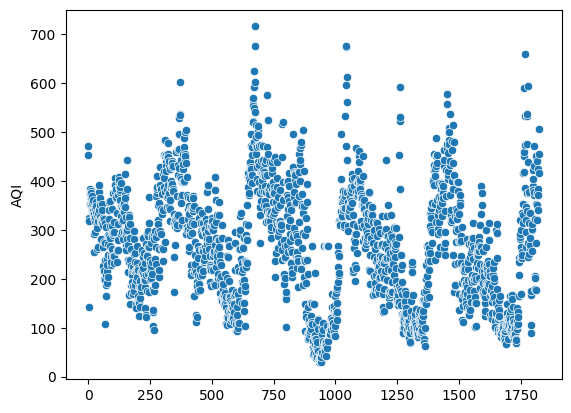

In [16]:
sns.scatterplot(polln.AQI)
plt.show()

In [17]:
polln.iloc[:,1:].describe()

PM2.5         PM10           NO          NO2          NOx  \
count  1826.000000  1826.000000  1826.000000  1826.000000  1826.000000   
mean    120.896102   240.737662    40.620291    52.549309    60.544009   
std      84.229897   120.262625    33.823137    22.649614    38.036289   
min      10.240000    18.590000     3.570000    10.630000     0.000000   
25%      59.887500   150.257500    17.412500    34.987500    33.585000   
50%      97.850000   235.005000    28.900000    49.280000    54.545000   
75%     159.767500   315.552500    53.442500    64.985000    77.647500   
max     685.360000   796.880000   221.030000   162.500000   254.800000   

               NH3           CO          SO2           O3      Benzene  \
count  1826.000000  1826.000000  1826.000000  1826.000000  1826.000000   
mean     42.791833     2.068083    16.113351    52.444902     3.629650   
std      17.781829     2.664679     8.033758    26.257984     2.486212   
min       6.780000     0.000000     2.340000     6.940000     0.000000   
25%      31.582500     0.940000    10.350000    34.310000     1.902500   
50%      39.140000     1.290000    15.175000    46.620000     3.045000   
75%      49.767500     1.930000    19.892500    61.427500     4.790000   
max     166.700000    30.440000    71.560000   257.730000    20.640000   

           Toluene       Xylene          AQI  
count  1826.000000  1826.000000  1826.000000  
mean     16.921720     1.538306   267.329295  
std      15.656309     1.894640   118.981019  
min       0.000000     0.000000    29.000000  
25%       6.260000     0.512500   174.000000  
50%      12.090000     1.538306   267.329295  
75%      22.847500     1.538306   352.000000  
max     103.000000    23.300000   716.000000

In [18]:
for i in polln.iloc[:,1:14]:
    outliers(polln,i)

<Axes: >

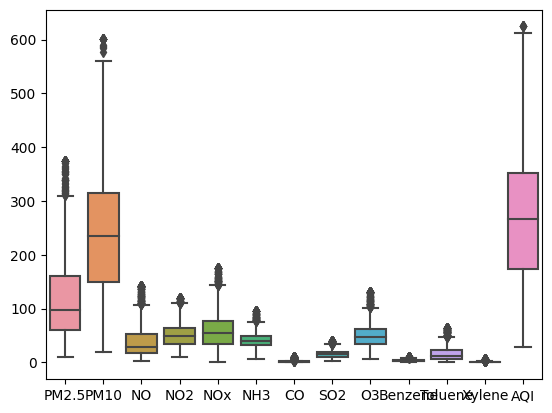

In [19]:
sns.boxplot(data=polln)

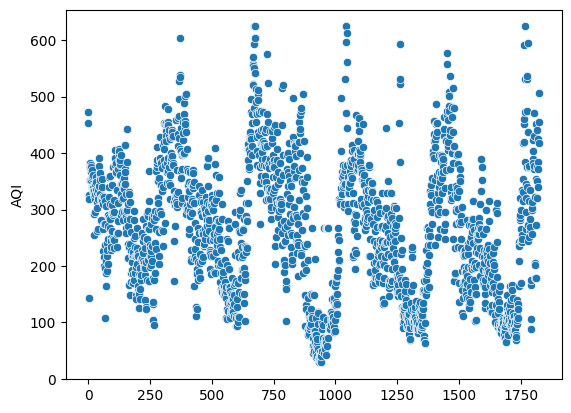

In [20]:
sns.scatterplot(polln.AQI)
plt.show()

In [21]:
polln.iloc[:,1:].describe()

PM2.5         PM10           NO          NO2          NOx  \
count  1826.000000  1826.000000  1826.000000  1826.000000  1826.000000   
mean    119.673172   240.120557    40.208970    52.383767    60.268950   
std      79.171774   118.052011    32.331292    22.066792    37.062681   
min      10.240000    18.590000     3.570000    10.630000     0.000000   
25%      59.887500   150.257500    17.412500    34.987500    33.585000   
50%      97.850000   235.005000    28.900000    49.280000    54.545000   
75%     159.767500   315.552500    53.442500    64.985000    77.647500   
max     373.585792   601.525536   142.089701   120.498150   174.652877   

               NH3           CO          SO2           O3      Benzene  \
count  1826.000000  1826.000000  1826.000000  1826.000000  1826.000000   
mean     42.305016     1.986822    15.942064    52.007815     3.608638   
std      15.589325     2.268006     7.331594    24.458371     2.400890   
min       6.780000     0.000000     2.340000     6.940000     0.000000   
25%      31.582500     0.940000    10.350000    34.310000     1.902500   
50%      39.140000     1.290000    15.175000    46.620000     3.045000   
75%      49.767500     1.930000    19.892500    61.427500     4.790000   
max      96.137320    10.062120    40.214624   131.218854    11.088285   

           Toluene       Xylene          AQI  
count  1826.000000  1826.000000  1826.000000  
mean     16.606340     1.445247   267.174659  
std      14.442519     1.287312   118.475038  
min       0.000000     0.000000    29.000000  
25%       6.260000     0.512500   174.000000  
50%      12.090000     1.538306   267.329295  
75%      22.847500     1.538306   352.000000  
max      63.890647     7.222226   624.272351

<Axes: ylabel='PM2.5'>

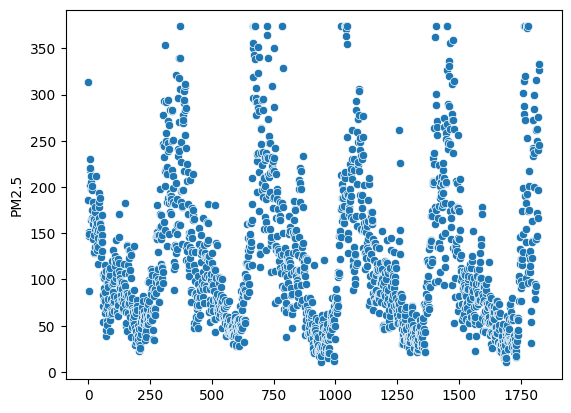

In [22]:
sns.scatterplot(polln['PM2.5'])

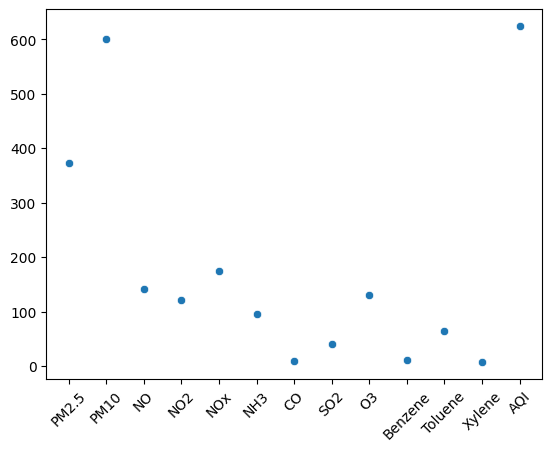

In [23]:
sns.scatterplot(polln.iloc[:,1:14].max())
plt.xticks(rotation=45)
plt.show()

## 2 . VARIATION OF VALUES ALONG THE YEARS

In [24]:
fractions=polln.AQI_Bucket.value_counts()/polln.shape[0]
fractions=fractions.reset_index()
fractions

AQI_Bucket     count
0          Poor  0.283133
1     Very Poor  0.272727
2      Moderate  0.230559
3        Severe  0.129244
4  Satisfactory  0.072837
5          Good  0.011501

In [25]:
fig = px.pie(fractions, values='count', names='AQI_Bucket', title='Categories of AQI Bucket')
fig.show()

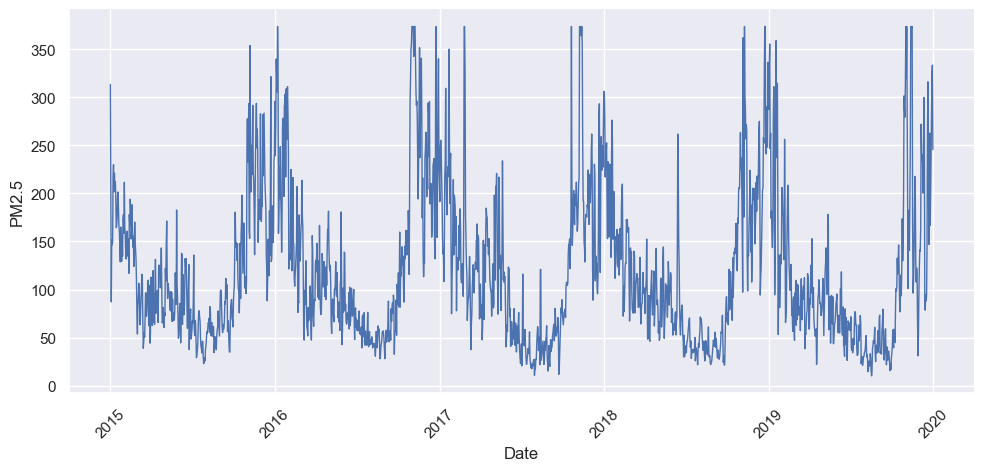

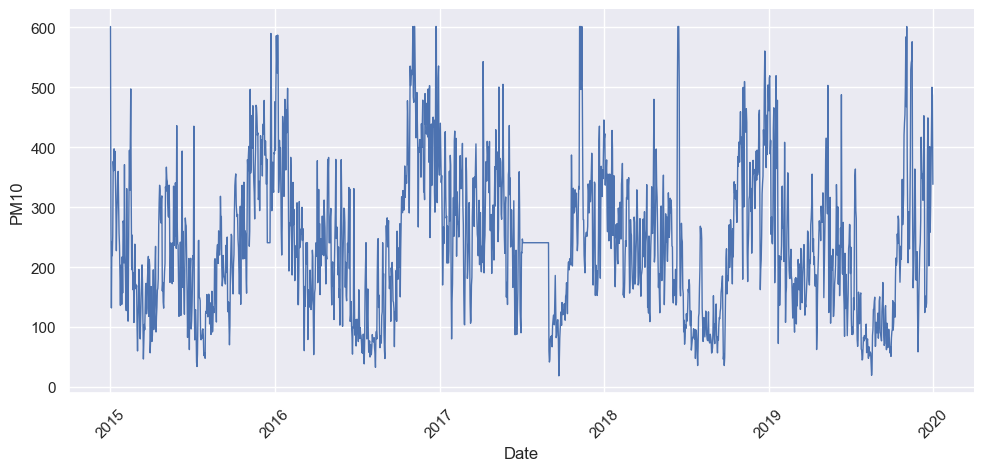

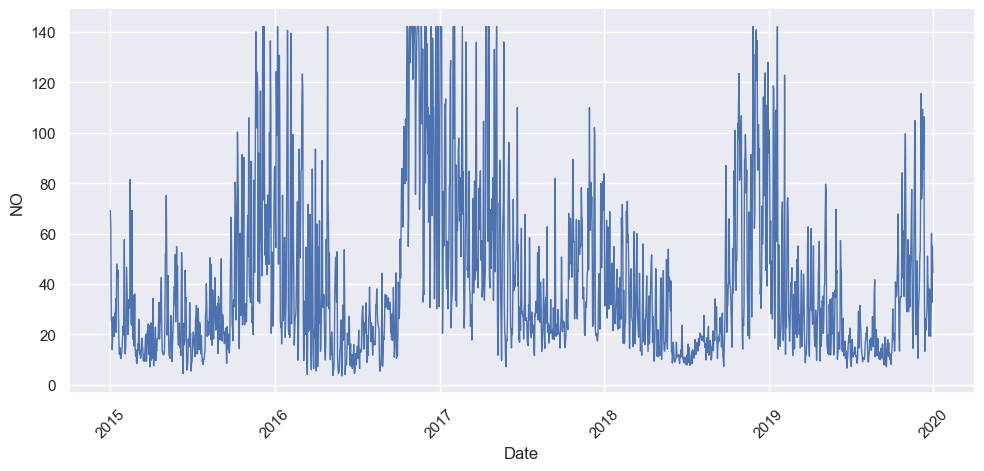

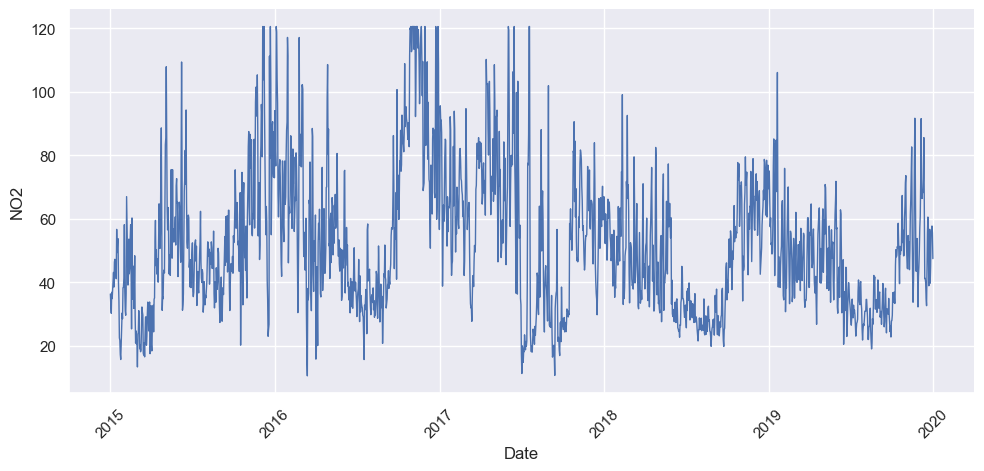

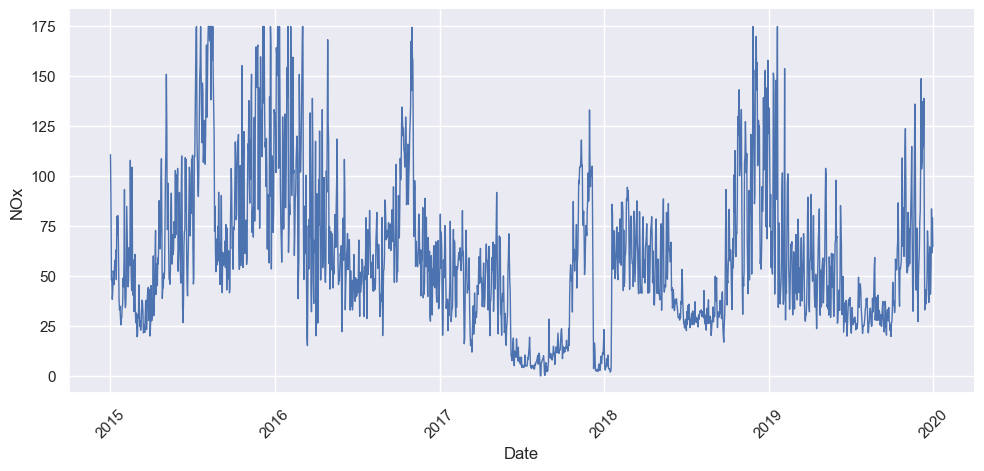

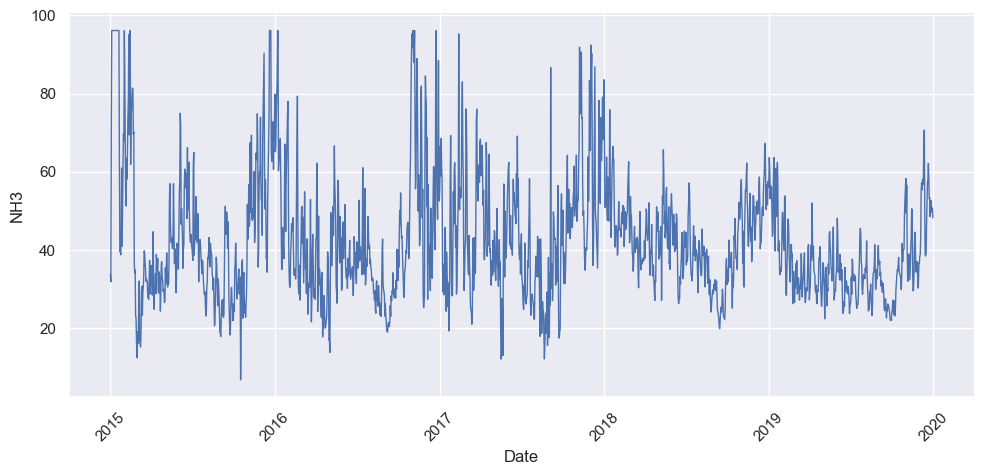

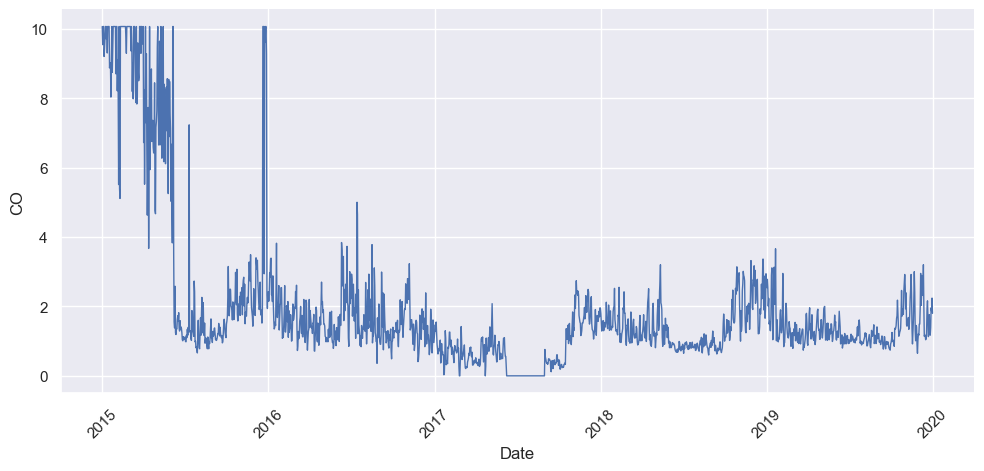

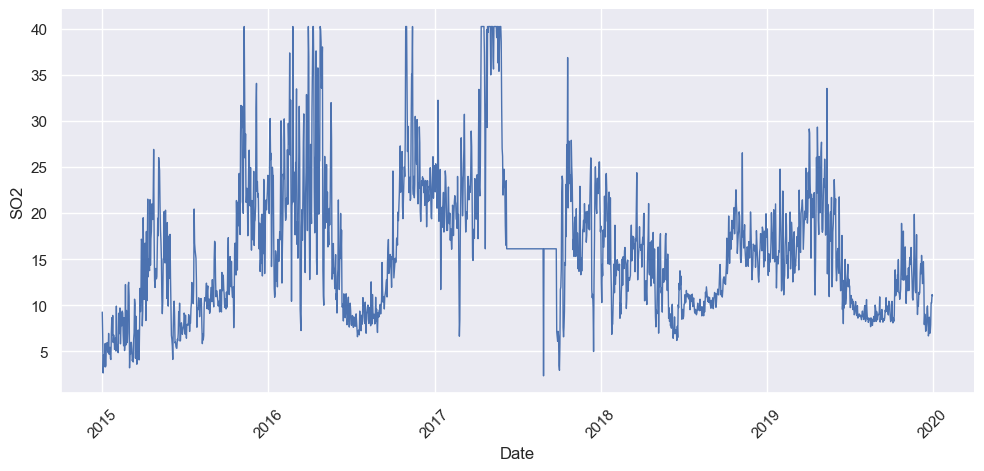

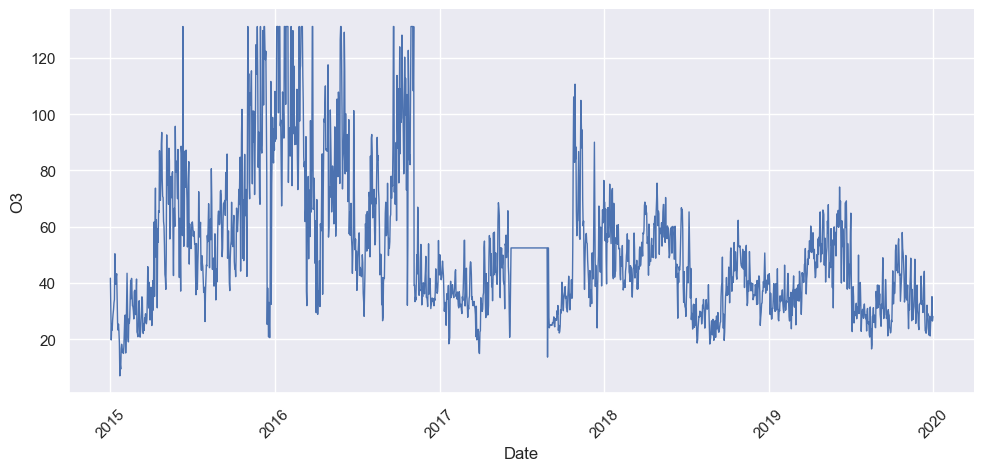

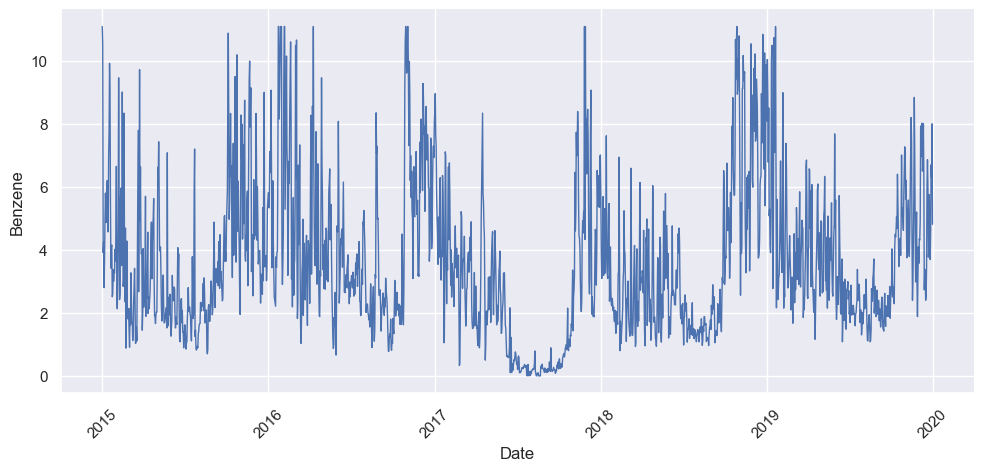

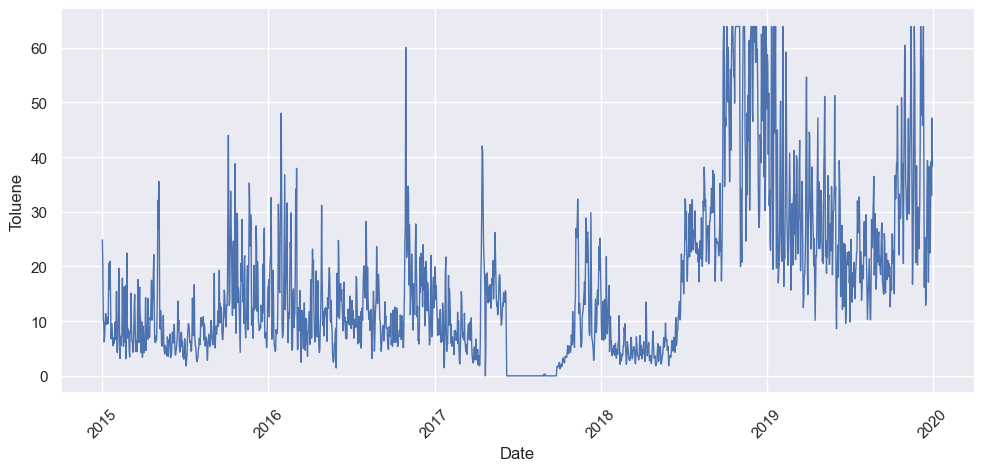

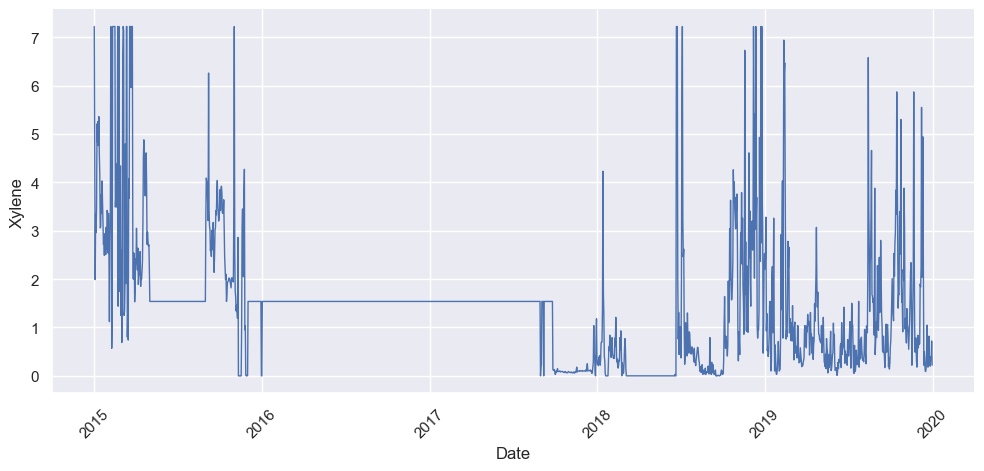

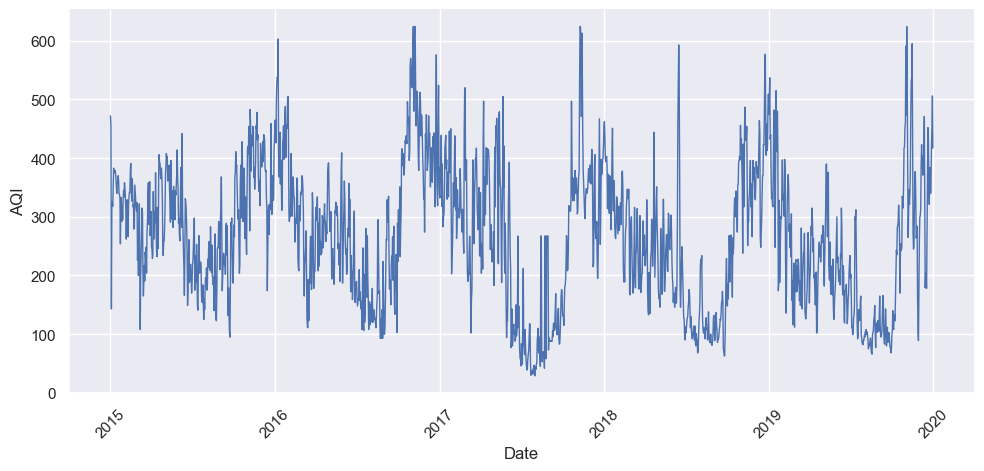

In [26]:
for i in polln.iloc[:,1:14]:   
   sns.set(rc={'figure.figsize': (10, 6)}) 
   sns.relplot(data=polln,x=polln.Date,y=i,label=i,kind='line',aspect=2, markers=True, markersize=4, linewidth=1) 
   plt.subplots_adjust(top=0.90)
   plt.xticks(rotation=45)
   plt.show() 


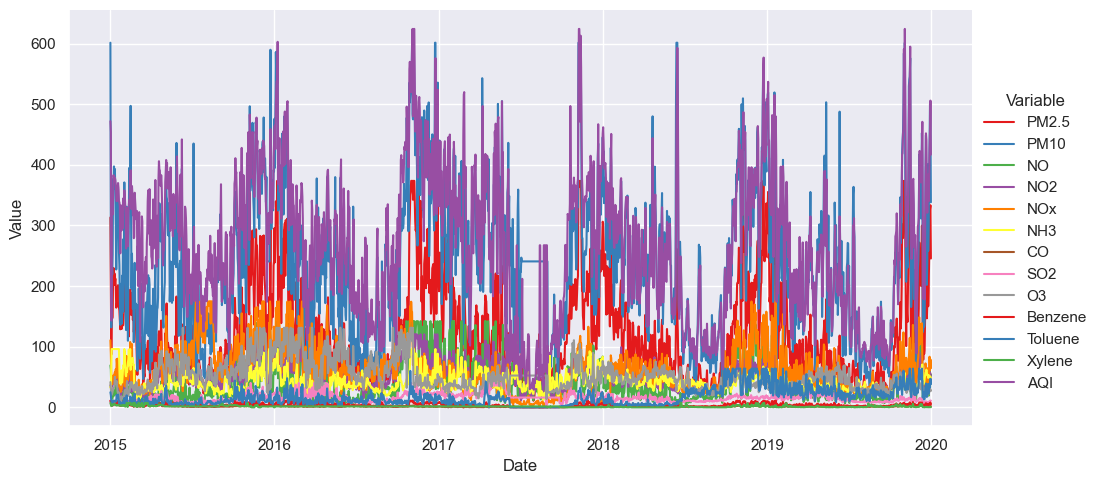

In [27]:
cols=polln.columns[1:14]
polln_melted = polln.melt(id_vars='Date', value_vars=cols, var_name='Variable', value_name='Value')
sns.relplot(data=polln_melted,x='Date',y='Value',hue='Variable',kind='line',aspect=2, markers=True, markersize=4, linewidth=1.5, palette='Set1')

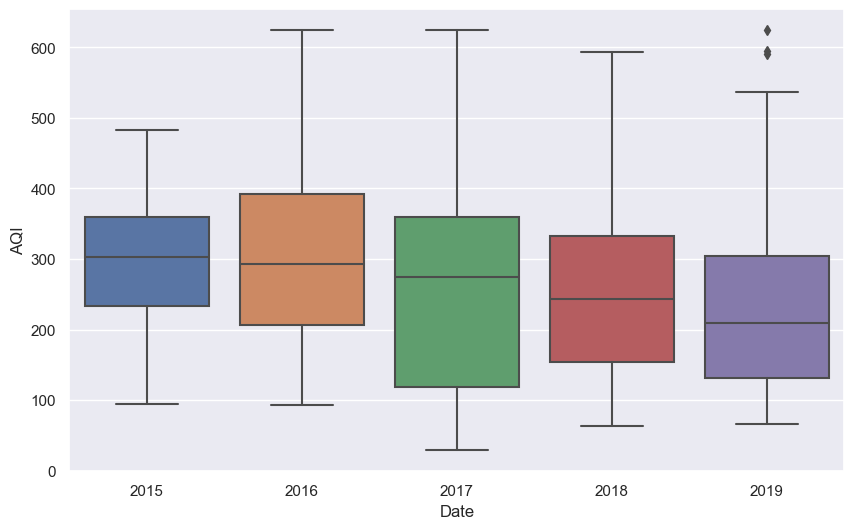

In [28]:
sns.boxplot(x=polln.Date.dt.year,y=polln.AQI)
plt.show()

## 3 . CORRELATION

In [29]:
corr=polln.iloc[:,1:14].corr()
with pd.option_context('display.expand_frame_repr', False):
  print(corr)

            PM2.5      PM10        NO       NO2       NOx       NH3        CO       SO2        O3   Benzene   Toluene    Xylene       AQI
PM2.5    1.000000  0.841799  0.675476  0.643031  0.478422  0.623107  0.172083  0.386480  0.243343  0.709828  0.365062  0.148685  0.884998
PM10     0.841799  1.000000  0.690939  0.680997  0.446049  0.533162  0.091780  0.482006  0.304061  0.638686  0.304006  0.138298  0.839638
NO       0.675476  0.690939  1.000000  0.772099  0.560024  0.497116 -0.006540  0.546660  0.187695  0.654663  0.393516  0.159975  0.629688
NO2      0.643031  0.680997  0.772099  1.000000  0.562917  0.508084 -0.011664  0.622862  0.422076  0.552739  0.214929  0.092827  0.642566
NOx      0.478422  0.446049  0.560024  0.562917  1.000000  0.321299  0.168509  0.246011  0.468462  0.618110  0.388722  0.204764  0.531804
NH3      0.623107  0.533162  0.497116  0.508084  0.321299  1.000000  0.261785  0.152051  0.142088  0.447706  0.121652  0.104797  0.538606
CO       0.172083  0.091780 -0.006

<Axes: >

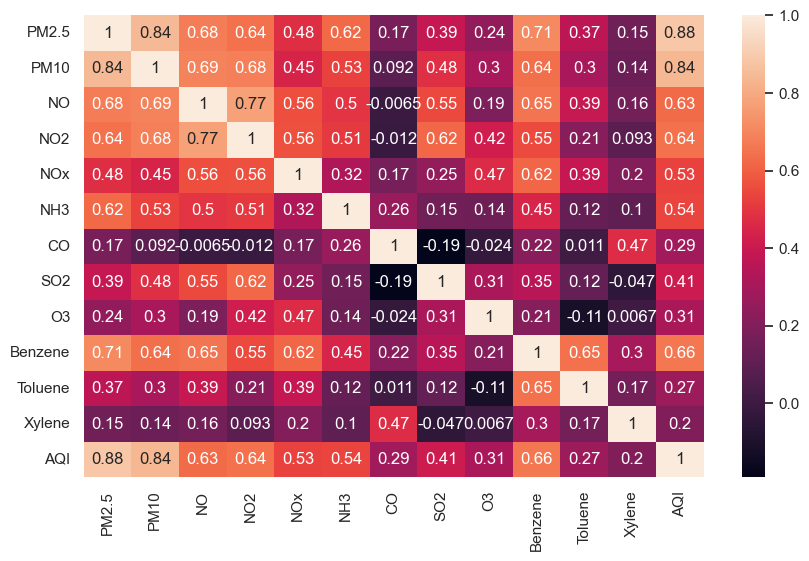

In [30]:
sns.heatmap(corr,annot=True)

In [31]:
model=LinearRegression()
X=polln[['PM2.5','PM10']]
y=polln['AQI']
X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,train_size=0.8)

In [32]:
model.fit(X_train,y_train)
prediction=model.predict(X_test)
r2=r2_score(y_test,prediction)
rmse=mean_squared_error(y_test,prediction)
print(r2,rmse)

0.8168439545720099 2669.1908361824553


In [33]:
coefficients=model.coef_
intercept=model.intercept_
def calc_aqi(PM2,PM10):
    return (PM2*coefficients[0])+(PM10*coefficients[1])+intercept

In [34]:
polln.iloc[1800]

Date          2019-12-06 00:00:00
PM2.5                      241.69
PM10                        362.1
NO                          73.76
NO2                         69.73
NOx                        103.48
NH3                         57.17
CO                           2.03
SO2                         13.41
O3                          32.34
Benzene                      7.86
Toluene                     57.33
Xylene                       1.84
AQI                         423.0
AQI_Bucket                 Severe
Name: 1800, dtype: object

In [35]:
print(calc_aqi(241.69,362.1))

418.99504065771714


# Weather Dataset

In [36]:
temp=pd.read_csv('delhi.csv')
temp

date_time  maxtempC  mintempC  totalSnow_cm  sunHour  \
0      2009-01-01 00:00:00        22         9           0.0      8.7   
1      2009-01-01 01:00:00        22         9           0.0      8.7   
2      2009-01-01 02:00:00        22         9           0.0      8.7   
3      2009-01-01 03:00:00        22         9           0.0      8.7   
4      2009-01-01 04:00:00        22         9           0.0      8.7   
...                    ...       ...       ...           ...      ...   
96427  2020-01-01 19:00:00        19        10           0.0      8.7   
96428  2020-01-01 20:00:00        19        10           0.0      8.7   
96429  2020-01-01 21:00:00        19        10           0.0      8.7   
96430  2020-01-01 22:00:00        19        10           0.0      8.7   
96431  2020-01-01 23:00:00        19        10           0.0      8.7   

       uvIndex  uvIndex.1  moon_illumination  moonrise   moonset  ...  \
0            4          1                 31  10:11 AM  09:57 PM  ...   
1            4          1                 31  10:11 AM  09:57 PM  ...   
2            4          1                 31  10:11 AM  09:57 PM  ...   
3            4          1                 31  10:11 AM  09:57 PM  ...   
4            4          1                 31  10:11 AM  09:57 PM  ...   
...        ...        ...                ...       ...       ...  ...   
96427        5          1                 37  11:28 AM  11:12 PM  ...   
96428        5          1                 37  11:28 AM  11:12 PM  ...   
96429        5          1                 37  11:28 AM  11:12 PM  ...   
96430        5          1                 37  11:28 AM  11:12 PM  ...   
96431        5          1                 37  11:28 AM  11:12 PM  ...   

      WindChillC WindGustKmph  cloudcover  humidity  precipMM  pressure  \
0             14           19           0        50       0.0      1016   
1             13           21           0        51       0.0      1016   
2             12           22           0        52       0.0      1016   
3             11           23           0        54       0.0      1016   
4             11           21           2        52       0.0      1016   
...          ...          ...         ...       ...       ...       ...   
96427         17           11          10        39       0.0      1020   
96428         16           11           9        40       0.0      1021   
96429         16           12           8        41       0.0      1021   
96430         15           11           8        42       0.0      1021   
96431         15           10           7        42       0.0      1022   

       tempC  visibility  winddirDegree  windspeedKmph  
0         10          10            331             12  
1         10          10            329             13  
2          9          10            327             13  
3          9          10            326             13  
4          9          10            318             13  
...      ...         ...            ...            ...  
96427     17          10             96              9  
96428     16          10             97              8  
96429     16          10             98              8  
96430     15          10             96              8  
96431     15          10             94              8  

[96432 rows x 25 columns]

In [37]:
temp.date_time=pd.to_datetime(temp.date_time)
temp=temp.drop(['moonrise','moonset','sunrise','sunset','totalSnow_cm'],axis=1)

In [38]:
temp=temp.groupby(temp.date_time.dt.date).mean()
temp=temp.drop('date_time',axis=1)
temp=temp.reset_index()
temp

date_time  maxtempC  mintempC  sunHour  uvIndex  uvIndex.1  \
0     2009-01-01      22.0       9.0      8.7      4.0   3.041667   
1     2009-01-02      22.0       5.0      8.7      4.0   2.958333   
2     2009-01-03      22.0       6.0      8.7      4.0   3.000000   
3     2009-01-04      20.0       8.0      8.7      4.0   3.166667   
4     2009-01-05      22.0      11.0      8.7      4.0   3.083333   
...          ...       ...       ...      ...      ...        ...   
4013  2019-12-28      22.0      13.0      8.7      5.0   3.291667   
4014  2019-12-29      19.0      14.0      8.7      5.0   3.083333   
4015  2019-12-30      20.0      14.0      7.1      5.0   2.958333   
4016  2019-12-31      17.0      10.0      7.1      4.0   2.666667   
4017  2020-01-01      19.0      10.0      8.7      5.0   2.958333   

      moon_illumination  DewPointC  FeelsLikeC  HeatIndexC  WindChillC  \
0                  31.0   4.250000   14.916667   15.416667   14.916667   
1                  38.0   7.750000   16.583333   16.666667   16.583333   
2                  45.0   6.208333   16.125000   16.333333   16.125000   
3                  52.0   4.583333   15.458333   16.041667   15.458333   
4                  60.0   8.458333   16.208333   16.833333   16.208333   
...                 ...        ...         ...         ...         ...   
4013                8.0   0.666667   18.583333   18.583333   18.583333   
4014               15.0  -1.791667   16.750000   17.000000   16.750000   
4015               22.0  -0.250000   16.625000   16.875000   16.625000   
4016               26.0  -3.208333   13.875000   14.416667   13.875000   
4017               37.0  -0.875000   14.333333   14.666667   14.333333   

      WindGustKmph  cloudcover   humidity  precipMM     pressure      tempC  \
0        16.458333    4.958333  49.875000       0.0  1016.208333  12.833333   
1         6.250000    2.416667  59.625000       0.0  1016.750000  11.875000   
2         9.500000   10.041667  54.666667       0.0  1016.708333  12.416667   
3        11.750000   23.083333  48.000000       0.0  1015.041667  14.458333   
4        11.000000   11.375000  61.375000       0.0  1014.666667  14.708333   
...            ...         ...        ...       ...          ...        ...   
4013      5.833333    0.000000  30.708333       0.0  1018.625000  18.583333   
4014      3.958333    2.583333  28.291667       0.0  1019.000000  16.750000   
4015      6.916667   14.041667  31.625000       0.0  1018.083333  16.625000   
4016      9.708333   22.916667  30.083333       0.0  1019.083333  14.208333   
4017      9.708333   13.500000  34.250000       0.0  1020.375000  14.500000   

      visibility  winddirDegree  windspeedKmph  
0           10.0     312.666667      10.500000  
1           10.0     275.333333       3.416667  
2           10.0     102.458333       5.125000  
3           10.0      81.041667       6.375000  
4           10.0     172.750000       6.250000  
...          ...            ...            ...  
4013        10.0     258.416667       4.833333  
4014        10.0     212.916667       3.291667  
4015        10.0      91.833333       6.166667  
4016        10.0     120.708333       7.875000  
4017        10.0      98.958333       7.583333  

[4018 rows x 20 columns]

In [39]:
temp.date_time=pd.to_datetime(temp.date_time)
temp=temp[temp.date_time.dt.year>=2015]
temp=temp.reset_index(drop=True)
temp=temp.iloc[:1826,:]
temp

date_time  maxtempC  mintempC  sunHour  uvIndex  uvIndex.1  \
0    2015-01-01      23.0      11.0      8.7      4.0   3.250000   
1    2015-01-02      15.0      10.0      3.8      4.0   2.250000   
2    2015-01-03      18.0      12.0      8.7      4.0   2.916667   
3    2015-01-04      21.0      10.0      8.7      4.0   3.000000   
4    2015-01-05      21.0       8.0      8.7      4.0   3.000000   
...         ...       ...       ...      ...      ...        ...   
1821 2019-12-27      22.0      15.0      8.7      5.0   3.416667   
1822 2019-12-28      22.0      13.0      8.7      5.0   3.291667   
1823 2019-12-29      19.0      14.0      8.7      5.0   3.083333   
1824 2019-12-30      20.0      14.0      7.1      5.0   2.958333   
1825 2019-12-31      17.0      10.0      7.1      4.0   2.666667   

      moon_illumination  DewPointC  FeelsLikeC  HeatIndexC  WindChillC  \
0                  72.0   1.833333   16.333333   16.458333   16.375000   
1                  80.0   6.708333   12.958333   13.541667   12.958333   
2                  87.0  12.041667   15.083333   14.958333   15.083333   
3                  94.0   8.208333   16.375000   17.291667   16.375000   
4                 100.0   4.875000   14.916667   16.291667   14.916667   
...                 ...        ...         ...         ...         ...   
1821                0.0  -0.208333   18.708333   18.708333   18.708333   
1822                8.0   0.666667   18.583333   18.583333   18.583333   
1823               15.0  -1.791667   16.750000   17.000000   16.750000   
1824               22.0  -0.250000   16.625000   16.875000   16.625000   
1825               26.0  -3.208333   13.875000   14.416667   13.875000   

      WindGustKmph  cloudcover   humidity  precipMM     pressure      tempC  \
0         9.958333   13.291667  38.875000  0.000000  1017.125000  14.958333   
1        15.500000   62.375000  66.333333  0.008333  1019.250000  12.791667   
2         7.500000   41.375000  83.500000  0.000000  1018.375000  13.833333   
3        18.791667    0.500000  59.208333  0.000000  1019.250000  13.416667   
4        23.541667    0.416667  49.916667  0.000000  1016.125000  13.291667   
...            ...         ...        ...       ...          ...        ...   
1821      7.250000    0.000000  28.500000  0.000000  1017.208333  18.625000   
1822      5.833333    0.000000  30.708333  0.000000  1018.625000  18.583333   
1823      3.958333    2.583333  28.291667  0.000000  1019.000000  16.750000   
1824      6.916667   14.041667  31.625000  0.000000  1018.083333  16.625000   
1825      9.708333   22.916667  30.083333  0.000000  1019.083333  14.208333   

      visibility  winddirDegree  windspeedKmph  
0         10.000      66.750000       5.875000  
1          8.875      96.625000       9.916667  
2          9.000     123.083333       4.541667  
3         10.000     320.625000      12.416667  
4         10.000     296.250000      15.708333  
...          ...            ...            ...  
1821      10.000     305.416667       6.250000  
1822      10.000     258.416667       4.833333  
1823      10.000     212.916667       3.291667  
1824      10.000      91.833333       6.166667  
1825      10.000     120.708333       7.875000  

[1826 rows x 20 columns]

In [40]:
corrl=temp.iloc[:,1:].corr()
corrl

maxtempC  mintempC   sunHour   uvIndex  uvIndex.1  \
maxtempC           1.000000  0.924021  0.737693  0.950149   0.981404   
mintempC           0.924021  1.000000  0.680894  0.937443   0.927272   
sunHour            0.737693  0.680894  1.000000  0.695549   0.751973   
uvIndex            0.950149  0.937443  0.695549  1.000000   0.952937   
uvIndex.1          0.981404  0.927272  0.751973  0.952937   1.000000   
moon_illumination -0.045281 -0.047230 -0.014725 -0.051453  -0.047516   
DewPointC          0.377103  0.564298  0.414387  0.408299   0.378364   
FeelsLikeC         0.939427  0.956675  0.736479  0.922755   0.940457   
HeatIndexC         0.938977  0.956864  0.738813  0.922270   0.939077   
WindChillC         0.974211  0.937107  0.700731  0.948752   0.975781   
WindGustKmph       0.078361  0.016338  0.163052  0.031988   0.034097   
cloudcover         0.022219  0.211180  0.030123  0.016111  -0.027999   
humidity          -0.353871 -0.143571 -0.091577 -0.320407  -0.363873   
precipMM          -0.022226  0.068654 -0.070104 -0.038537  -0.069525   
pressure          -0.840583 -0.881026 -0.772127 -0.814860  -0.828676   
tempC              0.973330  0.977743  0.723213  0.960461   0.977088   
visibility         0.077040  0.038609  0.080408  0.084257   0.077365   
winddirDegree     -0.121067 -0.224751 -0.090907 -0.136581  -0.118096   
windspeedKmph      0.237253  0.216862  0.283561  0.216766   0.207811   

                   moon_illumination  DewPointC  FeelsLikeC  HeatIndexC  \
maxtempC                   -0.045281   0.377103    0.939427    0.938977   
mintempC                   -0.047230   0.564298    0.956675    0.956864   
sunHour                    -0.014725   0.414387    0.736479    0.738813   
uvIndex                    -0.051453   0.408299    0.922755    0.922270   
uvIndex.1                  -0.047516   0.378364    0.940457    0.939077   
moon_illumination           1.000000  -0.031991   -0.040260   -0.039687   
DewPointC                  -0.031991   1.000000    0.577343    0.581574   
FeelsLikeC                 -0.040260   0.577343    1.000000    0.999645   
HeatIndexC                 -0.039687   0.581574    0.999645    1.000000   
WindChillC                 -0.038879   0.398664    0.965613    0.964290   
WindGustKmph                0.055738  -0.029873   -0.024460   -0.022622   
cloudcover                  0.020778   0.561501    0.154211    0.155461   
humidity                    0.000285   0.672109   -0.144930   -0.139134   
precipMM                    0.069097   0.236672    0.042942    0.042904   
pressure                    0.023826  -0.642749   -0.913656   -0.914519   
tempC                      -0.048952   0.473871    0.963520    0.962670   
visibility                  0.048919  -0.110425    0.012914    0.013837   
winddirDegree               0.092166  -0.460528   -0.232217   -0.232694   
windspeedKmph               0.045803   0.070310    0.159859    0.161460   

                   WindChillC  WindGustKmph  cloudcover  humidity  precipMM  \
maxtempC             0.974211      0.078361    0.022219 -0.353871 -0.022226   
mintempC             0.937107      0.016338    0.211180 -0.143571  0.068654   
sunHour              0.700731      0.163052    0.030123 -0.091577 -0.070104   
uvIndex              0.948752      0.031988    0.016111 -0.320407 -0.038537   
uvIndex.1            0.975781      0.034097   -0.027999 -0.363873 -0.069525   
moon_illumination   -0.038879      0.055738    0.020778  0.000285  0.069097   
DewPointC            0.398664     -0.029873    0.561501  0.672109  0.236672   
FeelsLikeC           0.965613     -0.024460    0.154211 -0.144930  0.042942   
HeatIndexC           0.964290     -0.022622    0.155461 -0.139134  0.042904   
WindChillC           1.000000     -0.026034   -0.006698 -0.357470 -0.018414   
WindGustKmph        -0.026034      1.000000    0.162021  0.051573  0.185669   
cloudcover          -0.006698      0.162021    1.000000  0.629853  0.476249   
humidity            -0.357470      0.051573    0.6

In [41]:
temp

date_time  maxtempC  mintempC  sunHour  uvIndex  uvIndex.1  \
0    2015-01-01      23.0      11.0      8.7      4.0   3.250000   
1    2015-01-02      15.0      10.0      3.8      4.0   2.250000   
2    2015-01-03      18.0      12.0      8.7      4.0   2.916667   
3    2015-01-04      21.0      10.0      8.7      4.0   3.000000   
4    2015-01-05      21.0       8.0      8.7      4.0   3.000000   
...         ...       ...       ...      ...      ...        ...   
1821 2019-12-27      22.0      15.0      8.7      5.0   3.416667   
1822 2019-12-28      22.0      13.0      8.7      5.0   3.291667   
1823 2019-12-29      19.0      14.0      8.7      5.0   3.083333   
1824 2019-12-30      20.0      14.0      7.1      5.0   2.958333   
1825 2019-12-31      17.0      10.0      7.1      4.0   2.666667   

      moon_illumination  DewPointC  FeelsLikeC  HeatIndexC  WindChillC  \
0                  72.0   1.833333   16.333333   16.458333   16.375000   
1                  80.0   6.708333   12.958333   13.541667   12.958333   
2                  87.0  12.041667   15.083333   14.958333   15.083333   
3                  94.0   8.208333   16.375000   17.291667   16.375000   
4                 100.0   4.875000   14.916667   16.291667   14.916667   
...                 ...        ...         ...         ...         ...   
1821                0.0  -0.208333   18.708333   18.708333   18.708333   
1822                8.0   0.666667   18.583333   18.583333   18.583333   
1823               15.0  -1.791667   16.750000   17.000000   16.750000   
1824               22.0  -0.250000   16.625000   16.875000   16.625000   
1825               26.0  -3.208333   13.875000   14.416667   13.875000   

      WindGustKmph  cloudcover   humidity  precipMM     pressure      tempC  \
0         9.958333   13.291667  38.875000  0.000000  1017.125000  14.958333   
1        15.500000   62.375000  66.333333  0.008333  1019.250000  12.791667   
2         7.500000   41.375000  83.500000  0.000000  1018.375000  13.833333   
3        18.791667    0.500000  59.208333  0.000000  1019.250000  13.416667   
4        23.541667    0.416667  49.916667  0.000000  1016.125000  13.291667   
...            ...         ...        ...       ...          ...        ...   
1821      7.250000    0.000000  28.500000  0.000000  1017.208333  18.625000   
1822      5.833333    0.000000  30.708333  0.000000  1018.625000  18.583333   
1823      3.958333    2.583333  28.291667  0.000000  1019.000000  16.750000   
1824      6.916667   14.041667  31.625000  0.000000  1018.083333  16.625000   
1825      9.708333   22.916667  30.083333  0.000000  1019.083333  14.208333   

      visibility  winddirDegree  windspeedKmph  
0         10.000      66.750000       5.875000  
1          8.875      96.625000       9.916667  
2          9.000     123.083333       4.541667  
3         10.000     320.625000      12.416667  
4         10.000     296.250000      15.708333  
...          ...            ...            ...  
1821      10.000     305.416667       6.250000  
1822      10.000     258.416667       4.833333  
1823      10.000     212.916667       3.291667  
1824      10.000      91.833333       6.166667  
1825      10.000     120.708333       7.875000  

[1826 rows x 20 columns]

In [42]:
temp.isnull().sum()

date_time            0
maxtempC             0
mintempC             0
sunHour              0
uvIndex              0
uvIndex.1            0
moon_illumination    0
DewPointC            0
FeelsLikeC           0
HeatIndexC           0
WindChillC           0
WindGustKmph         0
cloudcover           0
humidity             0
precipMM             0
pressure             0
tempC                0
visibility           0
winddirDegree        0
windspeedKmph        0
dtype: int64

In [43]:
temp.iloc[:,1:].describe()

maxtempC     mintempC      sunHour      uvIndex    uvIndex.1  \
count  1826.000000  1826.000000  1826.000000  1826.000000  1826.000000   
mean     33.154436    23.292442    11.135214     6.984666     4.466799   
std       7.207319     7.922634     2.177530     1.591686     0.840278   
min      15.000000     5.000000     3.800000     3.000000     2.041667   
25%      27.000000    16.000000     8.700000     6.000000     3.791667   
50%      35.000000    25.000000    11.600000     7.000000     4.625000   
75%      38.000000    30.000000    13.200000     8.000000     5.083333   
max      52.000000    43.000000    14.000000    11.000000     6.333333   

       moon_illumination    DewPointC   FeelsLikeC   HeatIndexC   WindChillC  \
count        1826.000000  1826.000000  1826.000000  1826.000000  1826.000000   
mean           46.103505    11.548923    31.273092    31.348257    29.988157   
std            31.313120     7.930108     8.662043     8.566974     7.447768   
min             0.000000    -6.750000    11.250000    12.083333    11.250000   
25%            18.250000     5.677083    23.666667    24.010417    24.000000   
50%            46.000000    10.375000    33.020833    33.020833    31.791667   
75%            73.000000    19.114583    38.458333    38.458333    35.333333   
max           100.000000    25.708333    51.208333    51.208333    46.750000   

       WindGustKmph   cloudcover     humidity     precipMM     pressure  \
count   1826.000000  1826.000000  1826.000000  1826.000000  1826.000000   
mean      11.888988    15.690124    37.077903     0.036738  1007.213582   
std        4.685752    18.322218    16.635328     0.171148     7.653245   
min        3.166667     0.000000     4.708333     0.000000   988.958333   
25%        8.458333     1.260417    24.177083     0.000000  1000.333333   
50%       11.125000     7.645833    34.875000     0.000000  1007.020833   
75%       14.666667    26.010417    49.947917     0.000000  1014.125000   
max       46.208333    88.125000    88.375000     2.750000  1022.791667   

             tempC   visibility  winddirDegree  windspeedKmph  
count  1826.000000  1826.000000    1826.000000    1826.000000  
mean     27.875799    10.014878     213.005385       9.201967  
std       7.800981     0.901079      77.585260       3.469735  
min       9.583333     5.500000      42.000000       2.750000  
25%      21.218750    10.000000     139.260417       6.677083  
50%      30.000000    10.000000     227.520833       8.750000  
75%      33.625000    10.000000     285.197917      11.166667  
max      46.750000    20.000000     337.166667      30.208333

## 1 . CHECKING OUTLIERS

In [44]:
temp1=temp.drop(['pressure','winddirDegree'],axis=1)
temp1

date_time  maxtempC  mintempC  sunHour  uvIndex  uvIndex.1  \
0    2015-01-01      23.0      11.0      8.7      4.0   3.250000   
1    2015-01-02      15.0      10.0      3.8      4.0   2.250000   
2    2015-01-03      18.0      12.0      8.7      4.0   2.916667   
3    2015-01-04      21.0      10.0      8.7      4.0   3.000000   
4    2015-01-05      21.0       8.0      8.7      4.0   3.000000   
...         ...       ...       ...      ...      ...        ...   
1821 2019-12-27      22.0      15.0      8.7      5.0   3.416667   
1822 2019-12-28      22.0      13.0      8.7      5.0   3.291667   
1823 2019-12-29      19.0      14.0      8.7      5.0   3.083333   
1824 2019-12-30      20.0      14.0      7.1      5.0   2.958333   
1825 2019-12-31      17.0      10.0      7.1      4.0   2.666667   

      moon_illumination  DewPointC  FeelsLikeC  HeatIndexC  WindChillC  \
0                  72.0   1.833333   16.333333   16.458333   16.375000   
1                  80.0   6.708333   12.958333   13.541667   12.958333   
2                  87.0  12.041667   15.083333   14.958333   15.083333   
3                  94.0   8.208333   16.375000   17.291667   16.375000   
4                 100.0   4.875000   14.916667   16.291667   14.916667   
...                 ...        ...         ...         ...         ...   
1821                0.0  -0.208333   18.708333   18.708333   18.708333   
1822                8.0   0.666667   18.583333   18.583333   18.583333   
1823               15.0  -1.791667   16.750000   17.000000   16.750000   
1824               22.0  -0.250000   16.625000   16.875000   16.625000   
1825               26.0  -3.208333   13.875000   14.416667   13.875000   

      WindGustKmph  cloudcover   humidity  precipMM      tempC  visibility  \
0         9.958333   13.291667  38.875000  0.000000  14.958333      10.000   
1        15.500000   62.375000  66.333333  0.008333  12.791667       8.875   
2         7.500000   41.375000  83.500000  0.000000  13.833333       9.000   
3        18.791667    0.500000  59.208333  0.000000  13.416667      10.000   
4        23.541667    0.416667  49.916667  0.000000  13.291667      10.000   
...            ...         ...        ...       ...        ...         ...   
1821      7.250000    0.000000  28.500000  0.000000  18.625000      10.000   
1822      5.833333    0.000000  30.708333  0.000000  18.583333      10.000   
1823      3.958333    2.583333  28.291667  0.000000  16.750000      10.000   
1824      6.916667   14.041667  31.625000  0.000000  16.625000      10.000   
1825      9.708333   22.916667  30.083333  0.000000  14.208333      10.000   

      windspeedKmph  
0          5.875000  
1          9.916667  
2          4.541667  
3         12.416667  
4         15.708333  
...             ...  
1821       6.250000  
1822       4.833333  
1823       3.291667  
1824       6.166667  
1825       7.875000  

[1826 rows x 18 columns]

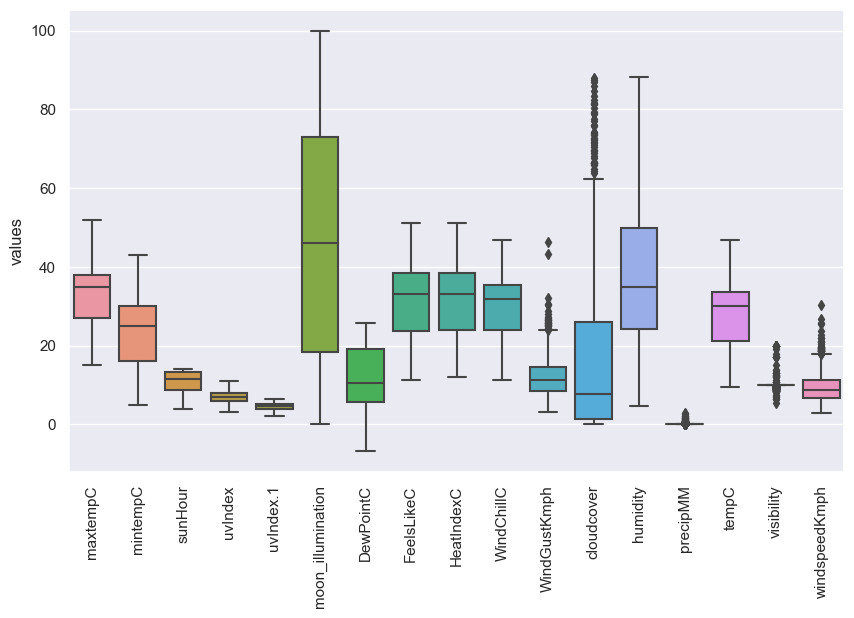

In [45]:
sns.boxplot(data=temp1)
plt.xticks(rotation=90)
plt.ylabel('values')
plt.show()

Text(0, 0.5, 'values')

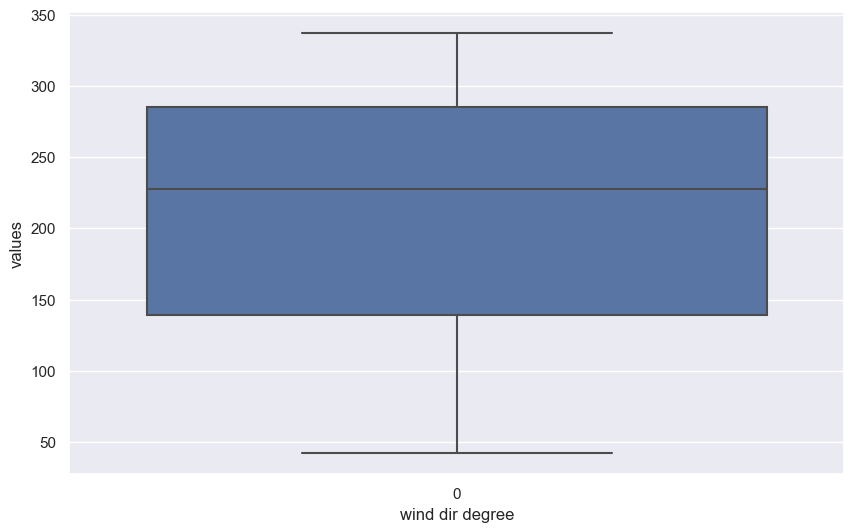

In [46]:
sns.boxplot(data=temp['winddirDegree'])
plt.xlabel('wind dir degree')
plt.ylabel('values')

Text(0, 0.5, 'values')

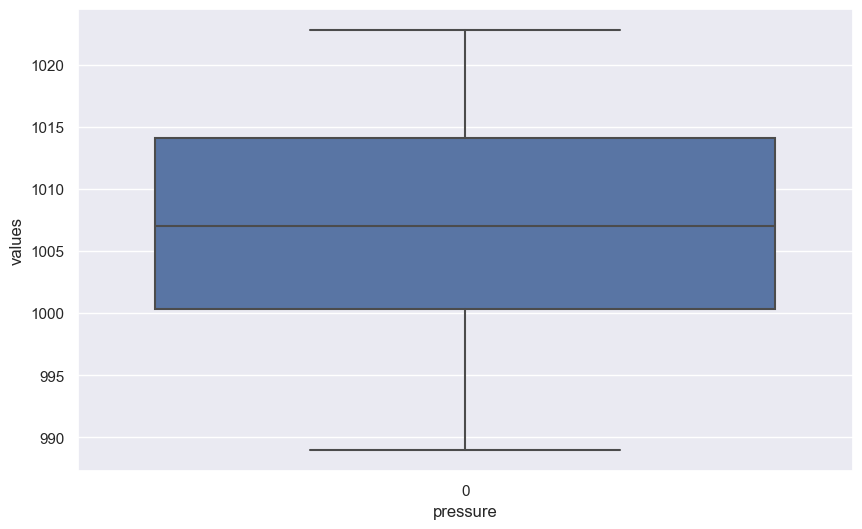

In [47]:
sns.boxplot(data=temp['pressure'])
plt.xlabel('pressure')
plt.ylabel('values')

In [48]:
for i in temp.iloc[:,1:]:
   outliers(temp,i)

In [49]:
temp.iloc[:,1:].describe()

maxtempC     mintempC      sunHour      uvIndex    uvIndex.1  \
count  1826.000000  1826.000000  1826.000000  1826.000000  1826.000000   
mean     33.154436    23.292442    11.138128     6.984666     4.466799   
std       7.207319     7.922634     2.168306     1.591686     0.840278   
min      15.000000     5.000000     4.602624     3.000000     2.041667   
25%      27.000000    16.000000     8.700000     6.000000     3.791667   
50%      35.000000    25.000000    11.600000     7.000000     4.625000   
75%      38.000000    30.000000    13.200000     8.000000     5.083333   
max      52.000000    43.000000    14.000000    11.000000     6.333333   

       moon_illumination    DewPointC   FeelsLikeC   HeatIndexC   WindChillC  \
count        1826.000000  1826.000000  1826.000000  1826.000000  1826.000000   
mean           46.103505    11.548923    31.273092    31.348257    29.988157   
std            31.313120     7.930108     8.662043     8.566974     7.447768   
min             0.000000    -6.750000    11.250000    12.083333    11.250000   
25%            18.250000     5.677083    23.666667    24.010417    24.000000   
50%            46.000000    10.375000    33.020833    33.020833    31.791667   
75%            73.000000    19.114583    38.458333    38.458333    35.333333   
max           100.000000    25.708333    51.208333    51.208333    46.750000   

       WindGustKmph   cloudcover     humidity     precipMM     pressure  \
count   1826.000000  1826.000000  1826.000000  1826.000000  1826.000000   
mean      11.854804    15.571613    37.077141     0.027444  1007.213582   
std        4.533305    17.925100    16.633009     0.088980     7.653245   
min        3.166667     0.000000     4.708333     0.000000   988.958333   
25%        8.458333     1.260417    24.177083     0.000000  1000.333333   
50%       11.125000     7.645833    34.875000     0.000000  1007.020833   
75%       14.666667    26.010417    49.947917     0.000000  1014.125000   
max       25.946244    70.656779    86.983886     0.550182  1022.791667   

             tempC   visibility  winddirDegree  windspeedKmph  
count  1826.000000  1826.000000    1826.000000    1826.000000  
mean     27.875799     9.963982     213.005385       9.176624  
std       7.800981     0.426150      77.585260       3.370220  
min       9.583333     7.311640      42.000000       2.750000  
25%      21.218750    10.000000     139.260417       6.677083  
50%      30.000000    10.000000     227.520833       8.750000  
75%      33.625000    10.000000     285.197917      11.166667  
max      46.750000    12.718115     337.166667      19.611173

## 2 . VARIATION ALONG TIME

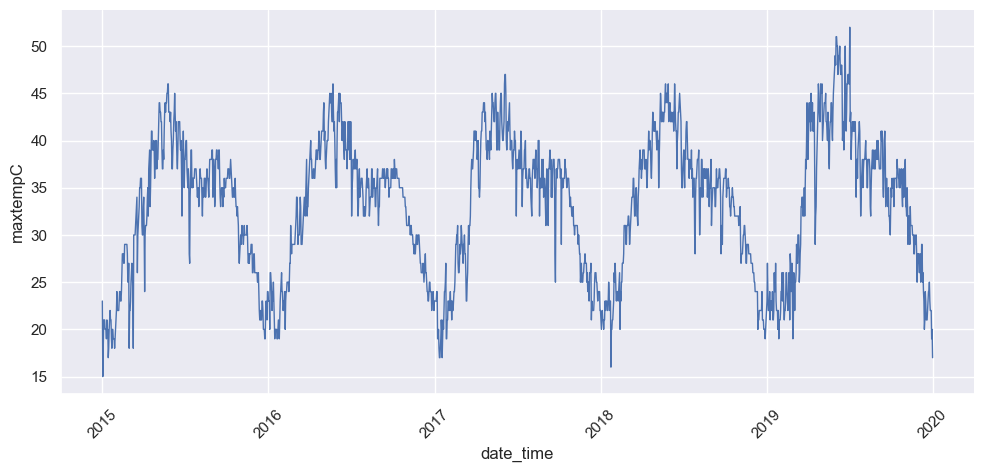

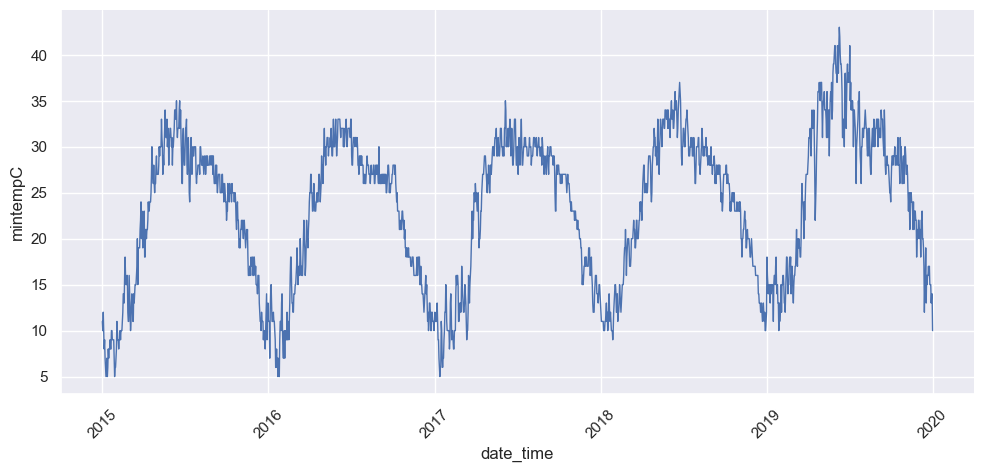

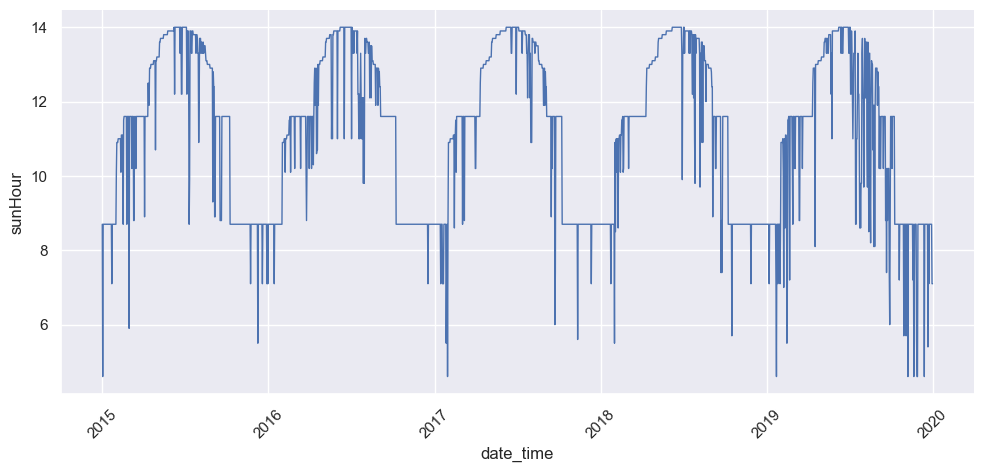

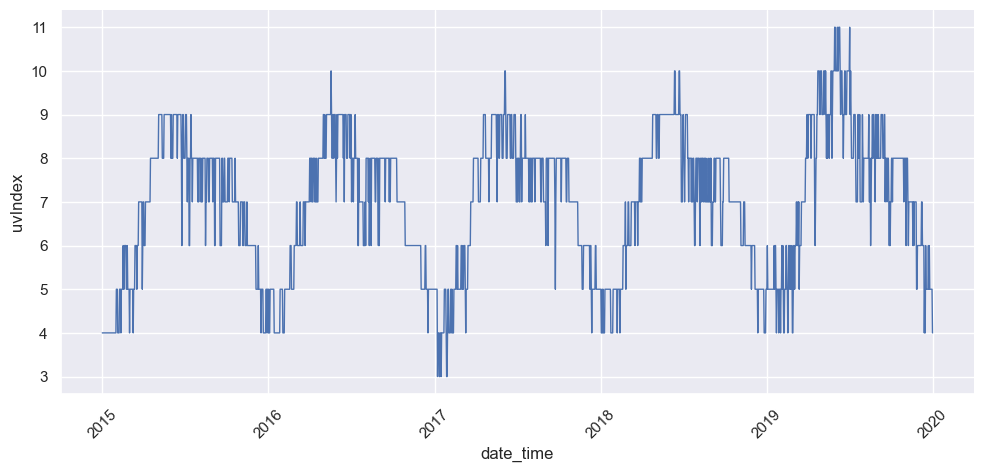

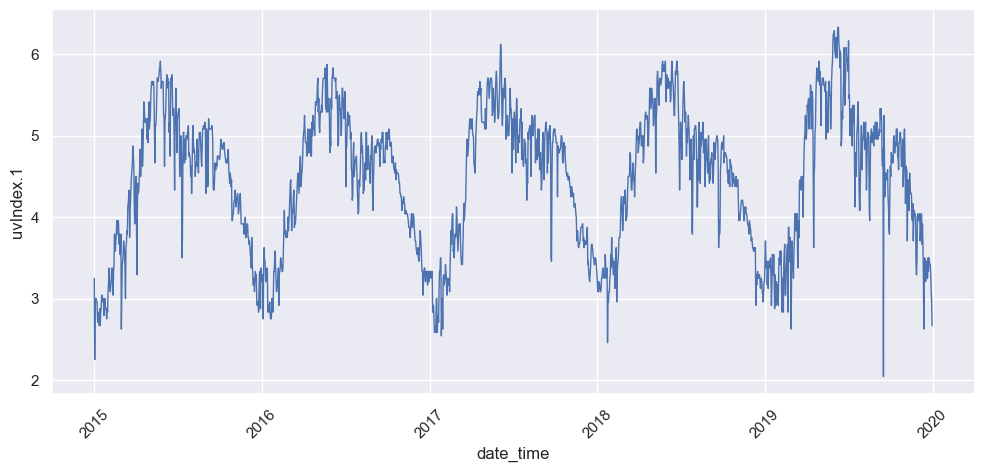

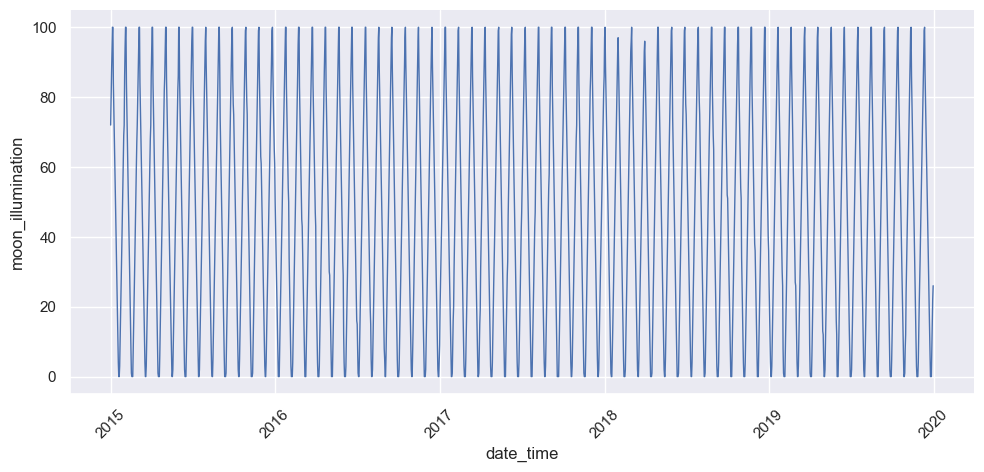

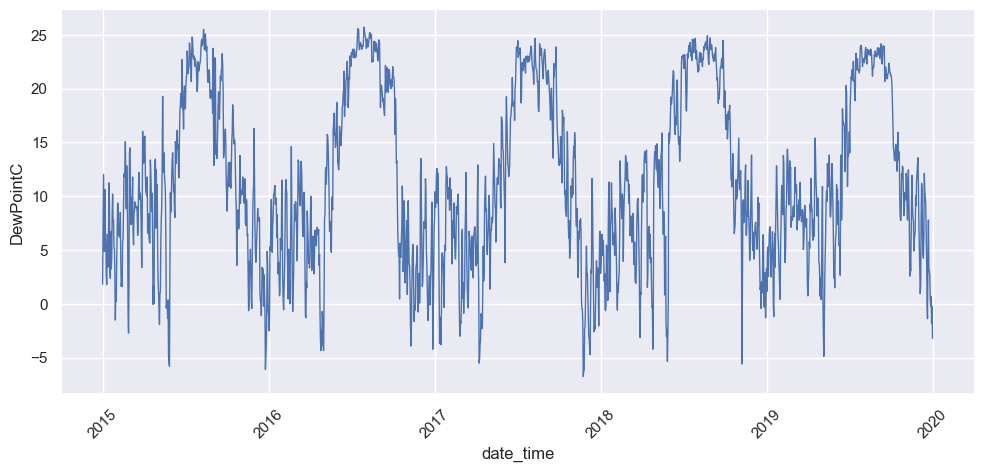

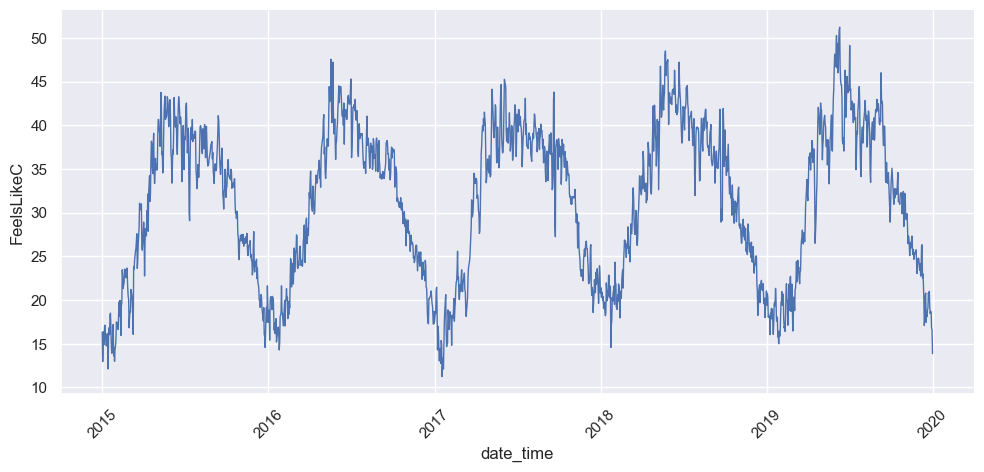

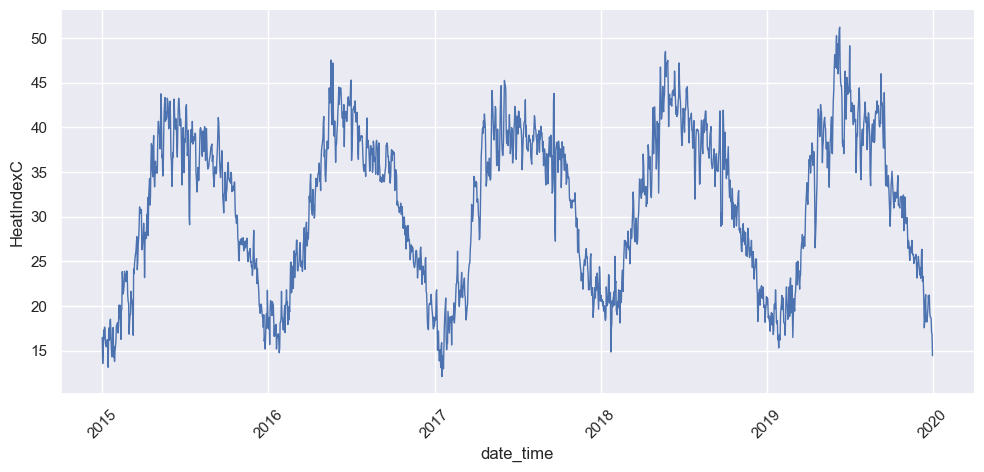

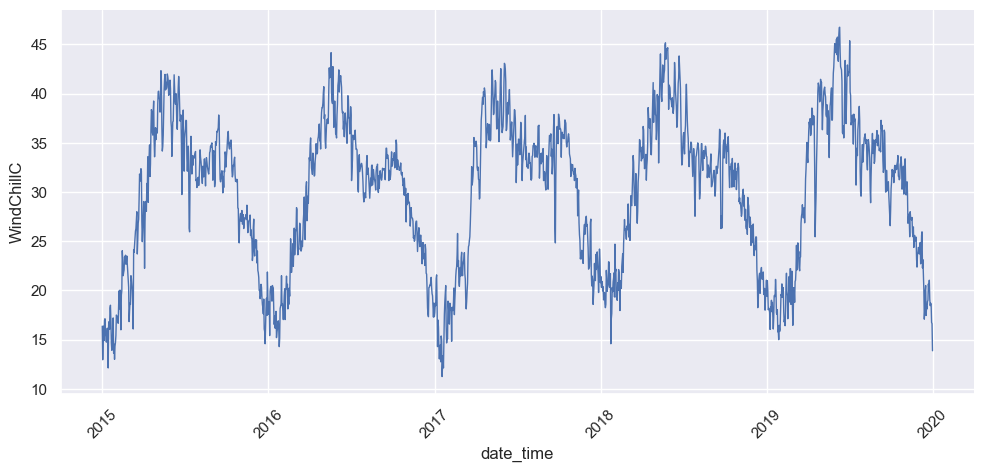

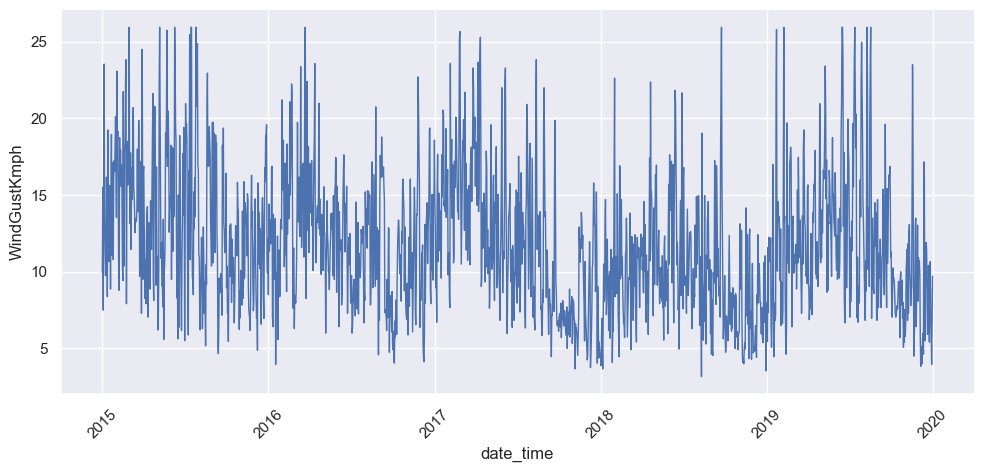

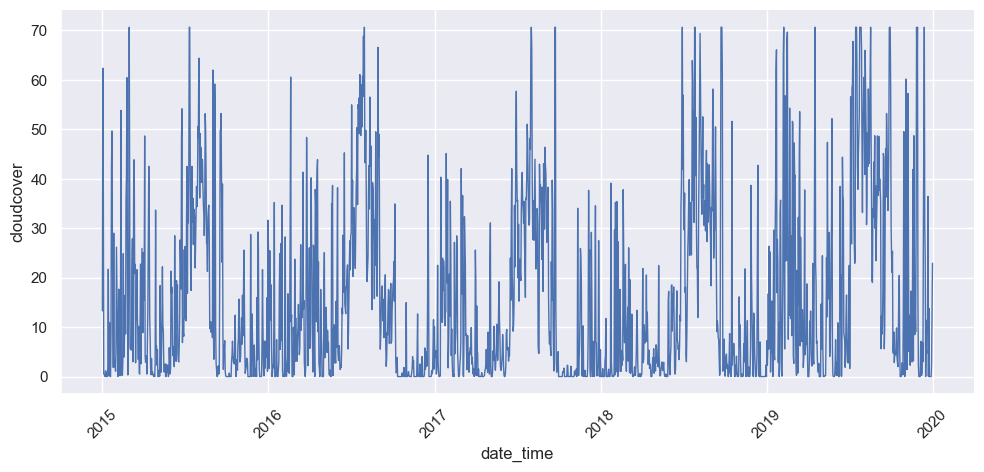

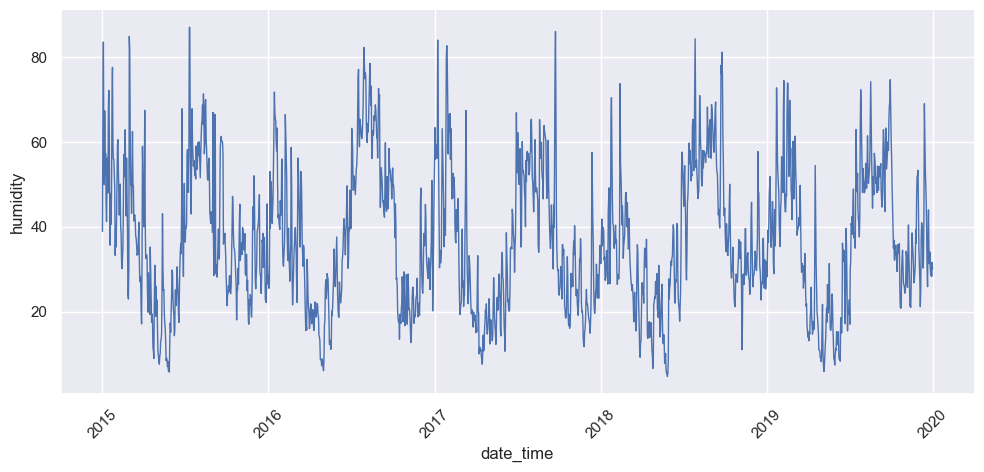

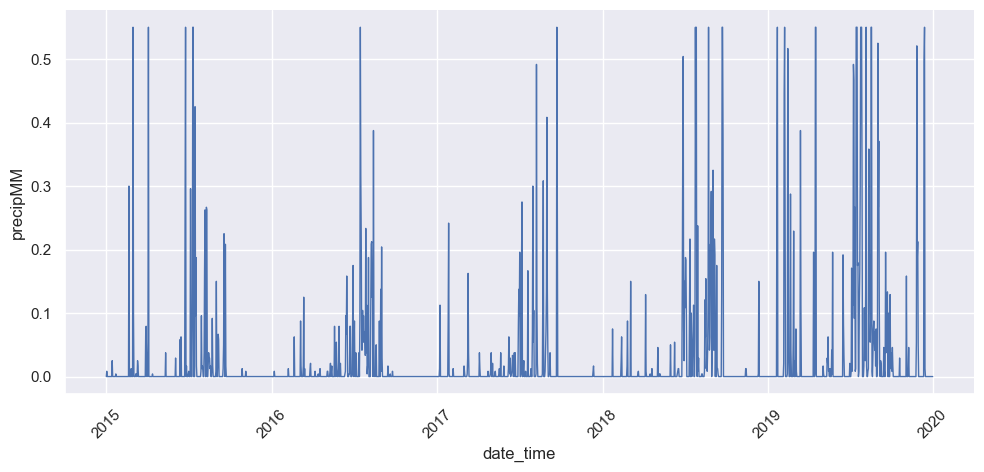

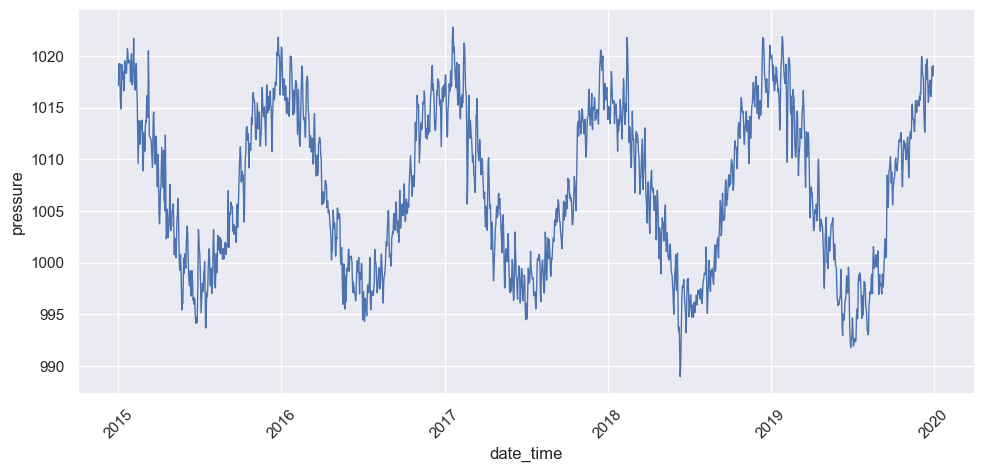

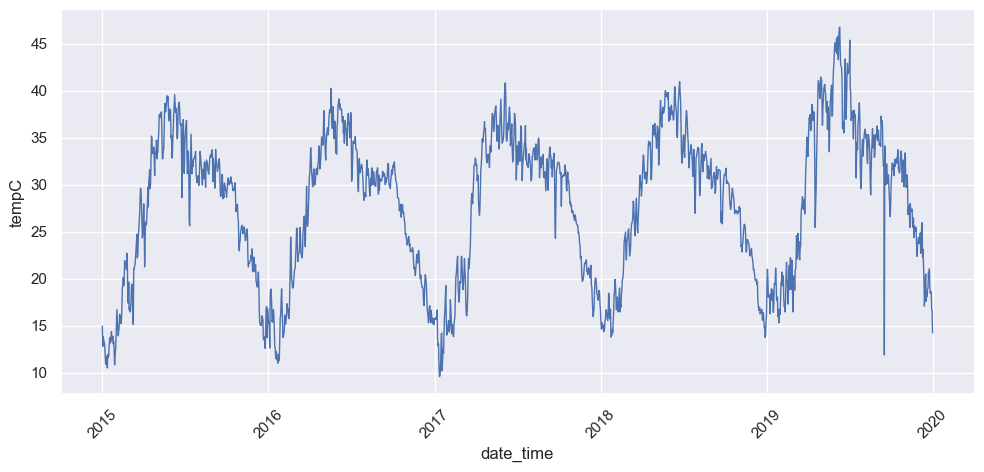

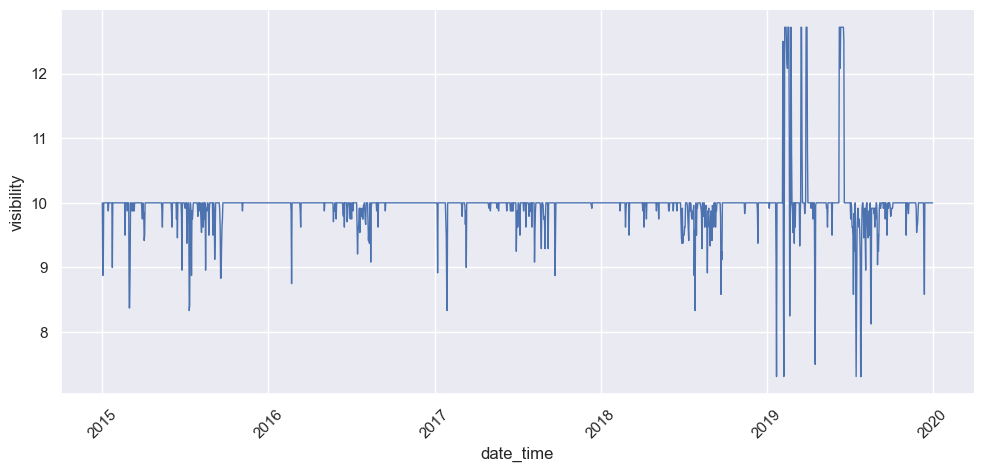

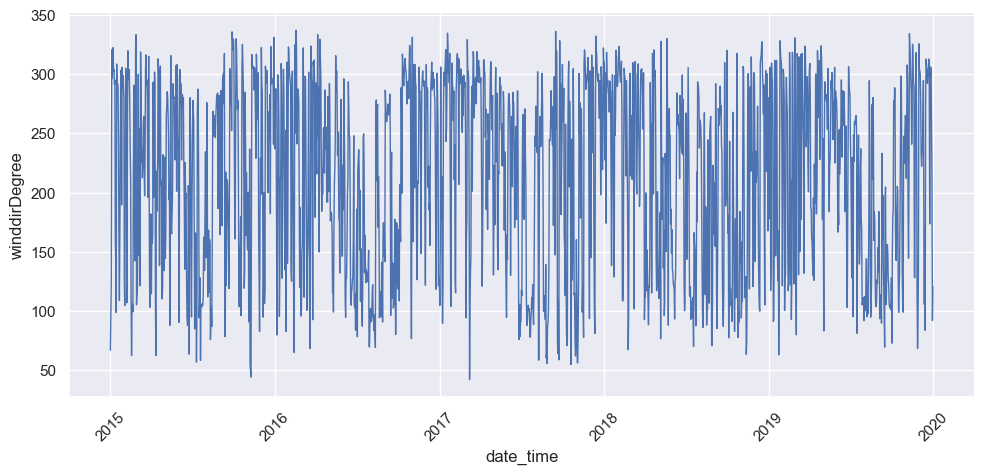

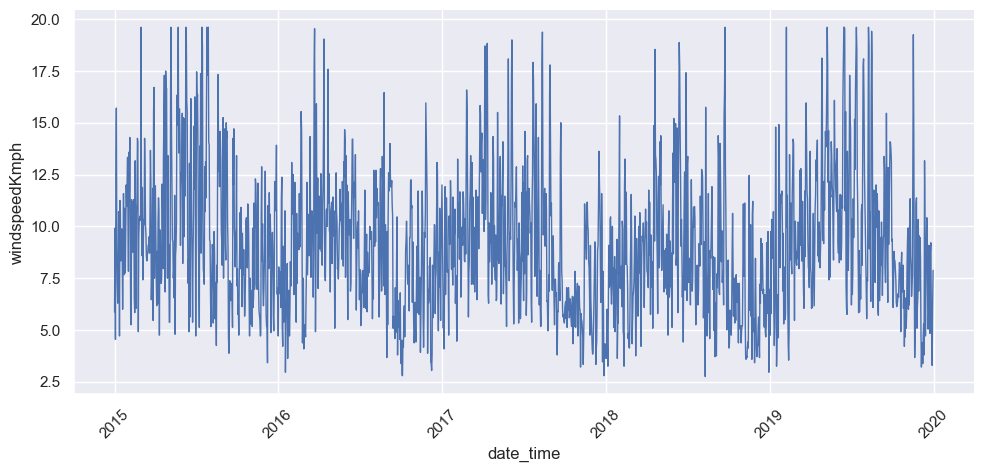

In [50]:
for i in temp.iloc[:,1:]:   
   sns.relplot(data=temp,x=temp.date_time,y=i,label=i,kind='line',aspect=2, markers=True, markersize=4, linewidth=1) 
   plt.subplots_adjust(top=0.90)
   plt.xticks(rotation=45)
   plt.show() 

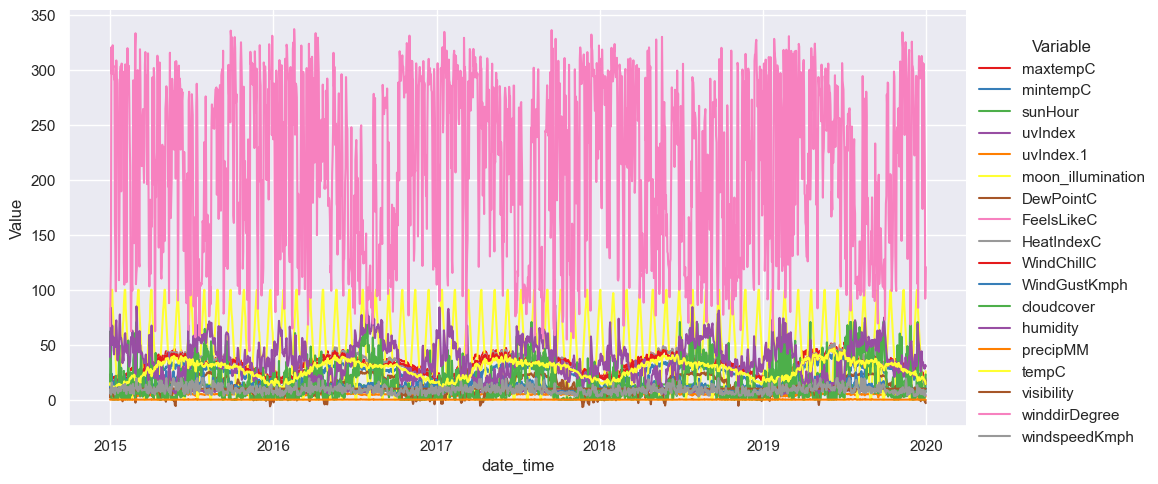

In [51]:
cols=(temp.drop('pressure',axis=1)).columns[1:]
temp_melted = temp.melt(id_vars='date_time', value_vars=cols, var_name='Variable', value_name='Value')
sns.relplot(data=temp_melted,x='date_time',y='Value',hue='Variable',kind='line',aspect=2, markers=True, markersize=4, linewidth=1.5, palette='Set1')

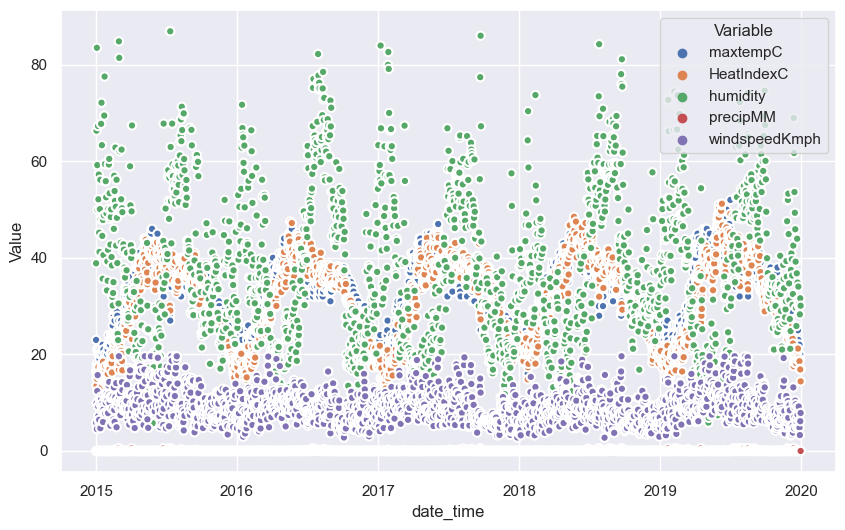

In [52]:
cols= ['date_time', 'maxtempC', 'HeatIndexC', 'humidity', 'precipMM', 'windspeedKmph']
temp_melted = temp.melt(id_vars='date_time', value_vars=cols, var_name='Variable', value_name='Value')
sns.scatterplot(data=temp_melted,x='date_time',y='Value',hue='Variable', markers=True, linewidth=1.5)
plt.show()

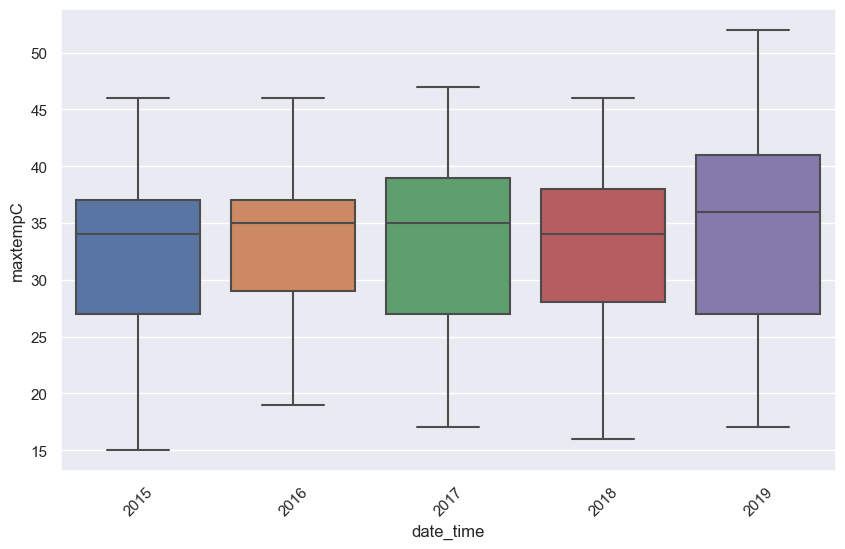

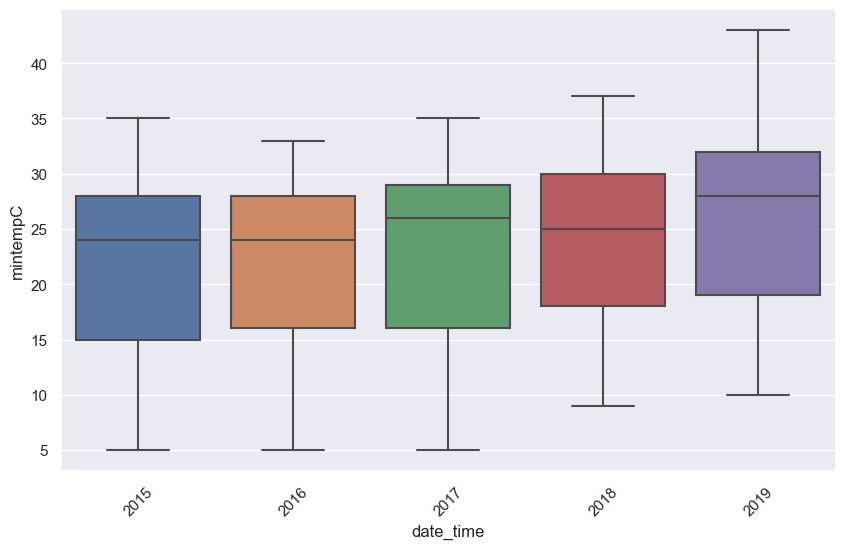

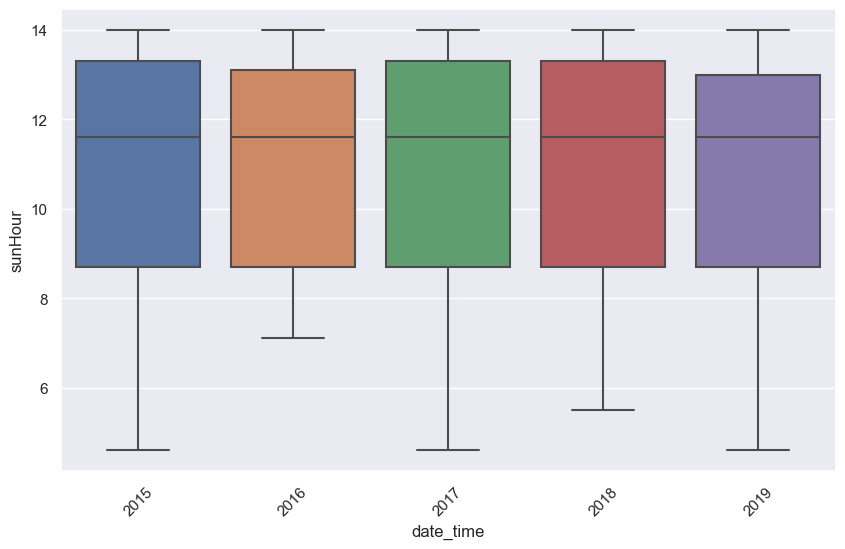

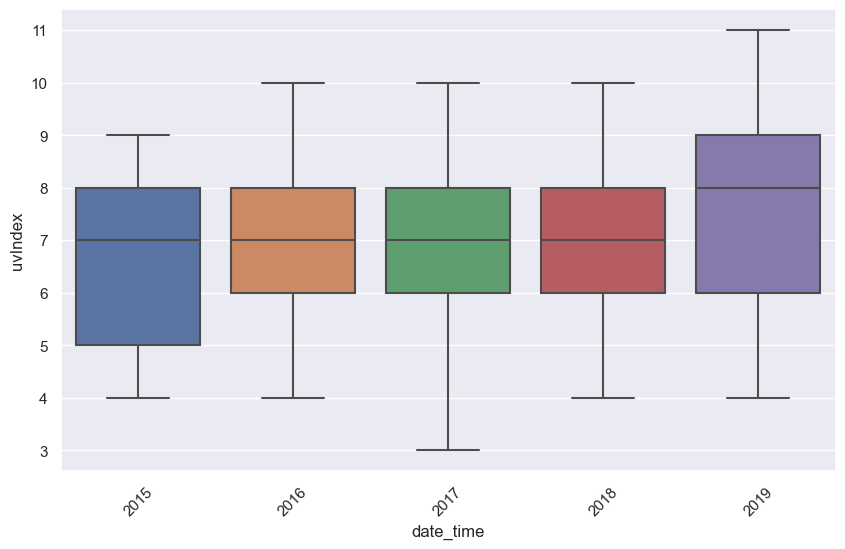

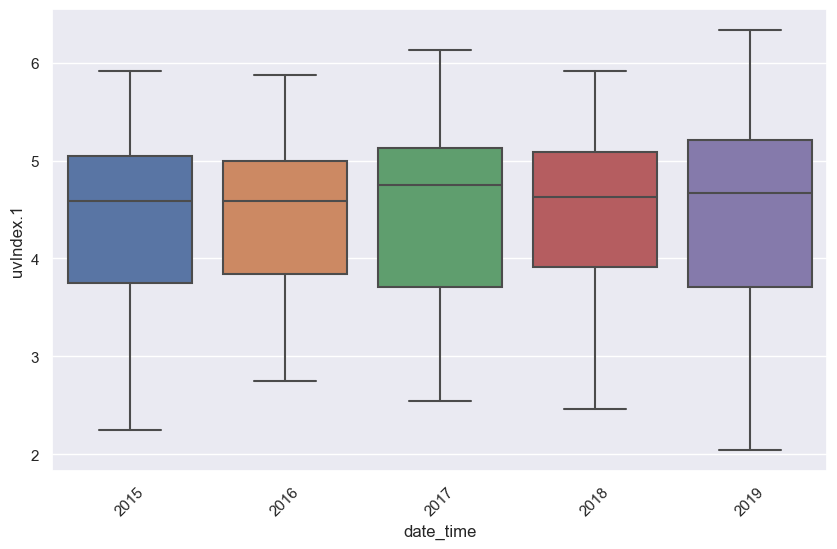

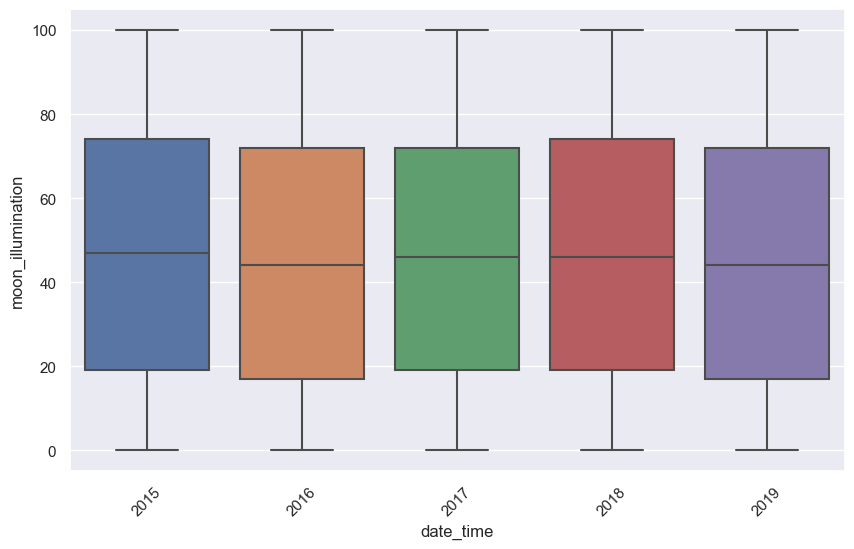

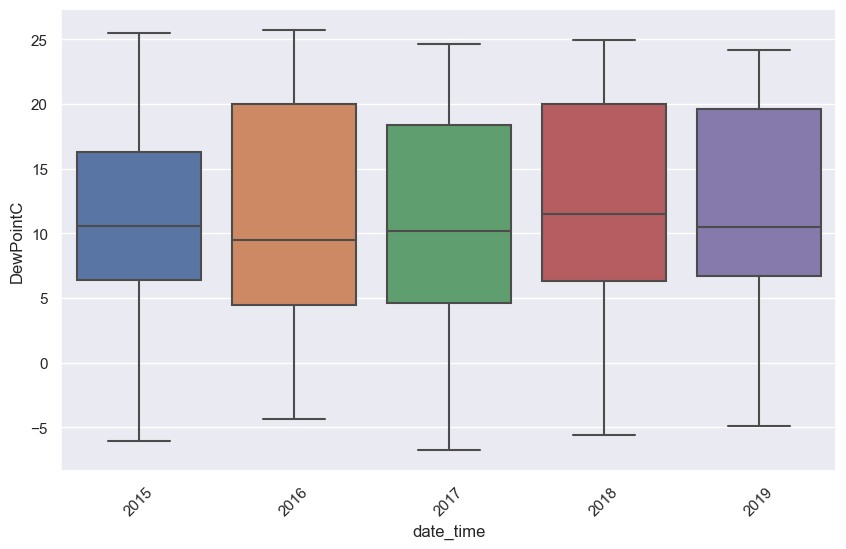

In [53]:
for i in temp.iloc[:,1:8]:   
   sns.boxplot(x=temp.date_time.dt.year,y=temp[i])
   plt.xticks(rotation=45)
   plt.show() 

## 3 . CORRELATION

In [54]:
corr=temp.iloc[:,1:].corr()
with pd.option_context('display.expand_frame_repr', False):
   print(corr)


                   maxtempC  mintempC   sunHour   uvIndex  uvIndex.1  moon_illumination  DewPointC  FeelsLikeC  HeatIndexC  WindChillC  WindGustKmph  cloudcover  humidity  precipMM  pressure     tempC  visibility  winddirDegree  windspeedKmph
maxtempC           1.000000  0.924021  0.738912  0.950149   0.981404          -0.045281   0.377103    0.939427    0.938977    0.974211      0.087524    0.026676 -0.353888 -0.000484 -0.840583  0.973330    0.049349      -0.121067       0.245699
mintempC           0.924021  1.000000  0.682553  0.937443   0.927272          -0.047230   0.564298    0.956675    0.956864    0.937107      0.019154    0.215358 -0.143601  0.118661 -0.881026  0.977743   -0.014957      -0.224751       0.221679
sunHour            0.738912  0.682553  1.000000  0.696704   0.752818          -0.014682   0.415912    0.737783    0.740153    0.701795      0.178307    0.044154 -0.090292 -0.034629 -0.774059  0.724806    0.073035      -0.092433       0.295869
uvIndex            0.950149 

# Merging datasets

In [123]:
PollRel=pd.merge(polln.AQI,temp,on=polln.Date)
PollRel=PollRel.drop('date_time',axis=1)
PollRel=PollRel.rename(columns={'key_0':'Dates'})
PollRel

Dates    AQI  maxtempC  mintempC   sunHour  uvIndex  uvIndex.1  \
0    2015-01-01  472.0      23.0      11.0  8.700000      4.0   3.250000   
1    2015-01-02  454.0      15.0      10.0  4.602624      4.0   2.250000   
2    2015-01-03  143.0      18.0      12.0  8.700000      4.0   2.916667   
3    2015-01-04  319.0      21.0      10.0  8.700000      4.0   3.000000   
4    2015-01-05  325.0      21.0       8.0  8.700000      4.0   3.000000   
...         ...    ...       ...       ...       ...      ...        ...   
1821 2019-12-27  372.0      22.0      15.0  8.700000      5.0   3.416667   
1822 2019-12-28  425.0      22.0      13.0  8.700000      5.0   3.291667   
1823 2019-12-29  455.0      19.0      14.0  8.700000      5.0   3.083333   
1824 2019-12-30  506.0      20.0      14.0  7.100000      5.0   2.958333   
1825 2019-12-31  417.0      17.0      10.0  7.100000      4.0   2.666667   

      moon_illumination  DewPointC  FeelsLikeC  ...  WindChillC  WindGustKmph  \
0                  72.0   1.833333   16.333333  ...   16.375000      9.958333   
1                  80.0   6.708333   12.958333  ...   12.958333     15.500000   
2                  87.0  12.041667   15.083333  ...   15.083333      7.500000   
3                  94.0   8.208333   16.375000  ...   16.375000     18.791667   
4                 100.0   4.875000   14.916667  ...   14.916667     23.541667   
...                 ...        ...         ...  ...         ...           ...   
1821                0.0  -0.208333   18.708333  ...   18.708333      7.250000   
1822                8.0   0.666667   18.583333  ...   18.583333      5.833333   
1823               15.0  -1.791667   16.750000  ...   16.750000      3.958333   
1824               22.0  -0.250000   16.625000  ...   16.625000      6.916667   
1825               26.0  -3.208333   13.875000  ...   13.875000      9.708333   

      cloudcover   humidity  precipMM     pressure      tempC  visibility  \
0      13.291667  38.875000  0.000000  1017.125000  14.958333      10.000   
1      62.375000  66.333333  0.008333  1019.250000  12.791667       8.875   
2      41.375000  83.500000  0.000000  1018.375000  13.833333       9.000   
3       0.500000  59.208333  0.000000  1019.250000  13.416667      10.000   
4       0.416667  49.916667  0.000000  1016.125000  13.291667      10.000   
...          ...        ...       ...          ...        ...         ...   
1821    0.000000  28.500000  0.000000  1017.208333  18.625000      10.000   
1822    0.000000  30.708333  0.000000  1018.625000  18.583333      10.000   
1823    2.583333  28.291667  0.000000  1019.000000  16.750000      10.000   
1824   14.041667  31.625000  0.000000  1018.083333  16.625000      10.000   
1825   22.916667  30.083333  0.000000  1019.083333  14.208333      10.000   

      winddirDegree  windspeedKmph  
0         66.750000       5.875000  
1         96.625000       9.916667  
2        123.083333       4.541667  
3        320.625000      12.416667  
4        296.250000      15.708333  
...             ...            ...  
1821     305.416667       6.250000  
1822     258.416667       4.833333  
1823     212.916667       3.291667  
1824      91.833333       6.166667  
1825     120.708333       7.875000  

[1826 rows x 21 columns]

In [56]:
corrl=PollRel.iloc[:,1:].corr()
corrl

AQI  maxtempC  mintempC   sunHour   uvIndex  \
AQI                1.000000 -0.376308 -0.491309 -0.494805 -0.383100   
maxtempC          -0.376308  1.000000  0.924021  0.738912  0.950149   
mintempC          -0.491309  0.924021  1.000000  0.682553  0.937443   
sunHour           -0.494805  0.738912  0.682553  1.000000  0.696704   
uvIndex           -0.383100  0.950149  0.937443  0.696704  1.000000   
uvIndex.1         -0.364925  0.981404  0.927272  0.752818  0.952937   
moon_illumination -0.013745 -0.045281 -0.047230 -0.014682 -0.051453   
DewPointC         -0.658247  0.377103  0.564298  0.415912  0.408299   
FeelsLikeC        -0.484646  0.939427  0.956675  0.737783  0.922755   
HeatIndexC        -0.487946  0.938977  0.956864  0.740153  0.922270   
WindChillC        -0.354513  0.974211  0.937107  0.701795  0.948752   
WindGustKmph      -0.107466  0.087524  0.019154  0.178307  0.037834   
cloudcover        -0.470073  0.026676  0.215358  0.044154  0.020192   
humidity          -0.411897 -0.353888 -0.143601 -0.090292 -0.320423   
precipMM          -0.259148 -0.000484  0.118661 -0.034629 -0.024766   
pressure           0.570289 -0.840583 -0.881026 -0.774059 -0.814860   
tempC             -0.439778  0.973330  0.977743  0.724806  0.960461   
visibility         0.123188  0.049349 -0.014957  0.073035  0.074681   
winddirDegree      0.231668 -0.121067 -0.224751 -0.092433 -0.136581   
windspeedKmph     -0.213942  0.245699  0.221679  0.295869  0.222687   

                   uvIndex.1  moon_illumination  DewPointC  FeelsLikeC  \
AQI                -0.364925          -0.013745  -0.658247   -0.484646   
maxtempC            0.981404          -0.045281   0.377103    0.939427   
mintempC            0.927272          -0.047230   0.564298    0.956675   
sunHour             0.752818          -0.014682   0.415912    0.737783   
uvIndex             0.952937          -0.051453   0.408299    0.922755   
uvIndex.1           1.000000          -0.047516   0.378364    0.940457   
moon_illumination  -0.047516           1.000000  -0.031991   -0.040260   
DewPointC           0.378364          -0.031991   1.000000    0.577343   
FeelsLikeC          0.940457          -0.040260   0.577343    1.000000   
HeatIndexC          0.939077          -0.039687   0.581574    0.999645   
WindChillC          0.975781          -0.038879   0.398664    0.965613   
WindGustKmph        0.043382           0.055696  -0.034826   -0.019786   
cloudcover         -0.022510           0.018493   0.565954    0.158940   
humidity           -0.363871           0.000313   0.672130   -0.144944   
precipMM           -0.056465           0.083918   0.340803    0.094252   
pressure           -0.828676           0.023826  -0.642749   -0.913656   
tempC               0.977088          -0.048952   0.473871    0.963520   
visibility          0.069551           0.017232  -0.206507   -0.030065   
winddirDegree      -0.118096           0.092166  -0.460528   -0.232217   
windspeedKmph       0.216665           0.043810   0.067284    0.165392   

                   HeatIndexC  WindChillC  WindGustKmph  cloudcover  humidity  \
AQI                 -0.487946   -0.354513     -0.107466   -0.470073 -0.411897   
maxtempC             0.938977    0.974211      0.087524    0.026676 -0.353888   
mintempC             0.956864    0.937107      0.019154    0.215358 -0.143601   
sunHour              0.740153    0.701795      0.178307    0.044154 -0.090292   
uvIndex              0.922270    0.948752      0.037834    0.020192 -0.320423   
uvIndex.1            0.939077    0.975781      0.043382   -0.022510 -0.363871   
moon_illumination   -0.039687   -0.038879      0.055696    0.018493  0.000313   
DewPointC            0.581574    0.398664     -0.034826    0.565954  0.672130   
FeelsLikeC           0.999645    0.965613     -0.019786    0.158940 -0.144944   
HeatIndexC           1.000000    0.964290     -0.017839    0.160265 -0.139147   
WindChillC           0.964290    1.000000     -0.020560   -0.003742 -0.357498   
WindG

In [57]:
temperature_weight = 0.4
wind_speed_weight = 0.3
humidity_weight = 0.3
PollRel['weather_stability'] = (temperature_weight * PollRel['maxtempC'] +
                                 wind_speed_weight * PollRel['windspeedKmph'] -
                                 humidity_weight * PollRel['humidity'])

In [58]:
PollRel['t_h_ratio']=PollRel['maxtempC']/PollRel['humidity']


In [59]:
PollRel['Air_Dryness']=np.abs(PollRel['tempC']-PollRel['WindChillC'])


In [60]:
PollRel['conn']=PollRel['mintempC']*PollRel['humidity']


In [61]:
PollRel['conn2']=PollRel['sunHour']*PollRel['DewPointC']

In [124]:
cols=['moon_illumination','WindGustKmph','precipMM','visibility','winddirDegree','windspeedKmph','uvIndex','uvIndex.1']
PollRel=PollRel.drop(cols,axis=1)

In [125]:
corr=PollRel.iloc[:,1:].corr()
corr

AQI  maxtempC  mintempC   sunHour  DewPointC  FeelsLikeC  \
AQI         1.000000 -0.376308 -0.491309 -0.494805  -0.658247   -0.484646   
maxtempC   -0.376308  1.000000  0.924021  0.738912   0.377103    0.939427   
mintempC   -0.491309  0.924021  1.000000  0.682553   0.564298    0.956675   
sunHour    -0.494805  0.738912  0.682553  1.000000   0.415912    0.737783   
DewPointC  -0.658247  0.377103  0.564298  0.415912   1.000000    0.577343   
FeelsLikeC -0.484646  0.939427  0.956675  0.737783   0.577343    1.000000   
HeatIndexC -0.487946  0.938977  0.956864  0.740153   0.581574    0.999645   
WindChillC -0.354513  0.974211  0.937107  0.701795   0.398664    0.965613   
cloudcover -0.470073  0.026676  0.215358  0.044154   0.565954    0.158940   
humidity   -0.411897 -0.353888 -0.143601 -0.090292   0.672130   -0.144944   
pressure    0.570289 -0.840583 -0.881026 -0.774059  -0.642749   -0.913656   
tempC      -0.439778  0.973330  0.977743  0.724806   0.473871    0.963520   

            HeatIndexC  WindChillC  cloudcover  humidity  pressure     tempC  
AQI          -0.487946   -0.354513   -0.470073 -0.411897  0.570289 -0.439778  
maxtempC      0.938977    0.974211    0.026676 -0.353888 -0.840583  0.973330  
mintempC      0.956864    0.937107    0.215358 -0.143601 -0.881026  0.977743  
sunHour       0.740153    0.701795    0.044154 -0.090292 -0.774059  0.724806  
DewPointC     0.581574    0.398664    0.565954  0.672130 -0.642749  0.473871  
FeelsLikeC    0.999645    0.965613    0.158940 -0.144944 -0.913656  0.963520  
HeatIndexC    1.000000    0.964290    0.160265 -0.139147 -0.914519  0.962670  
WindChillC    0.964290    1.000000   -0.003742 -0.357498 -0.837785  0.971850  
cloudcover    0.160265   -0.003742    1.000000  0.629207 -0.344000  0.131628  
humidity     -0.139147   -0.357498    0.629207  1.000000 -0.039906 -0.256077  
pressure     -0.914519   -0.837785   -0.344000 -0.039906  1.000000 -0.875040  
tempC         0.962670    0.971850    0.131628 -0.256077 -0.875040  1.000000

<Axes: >

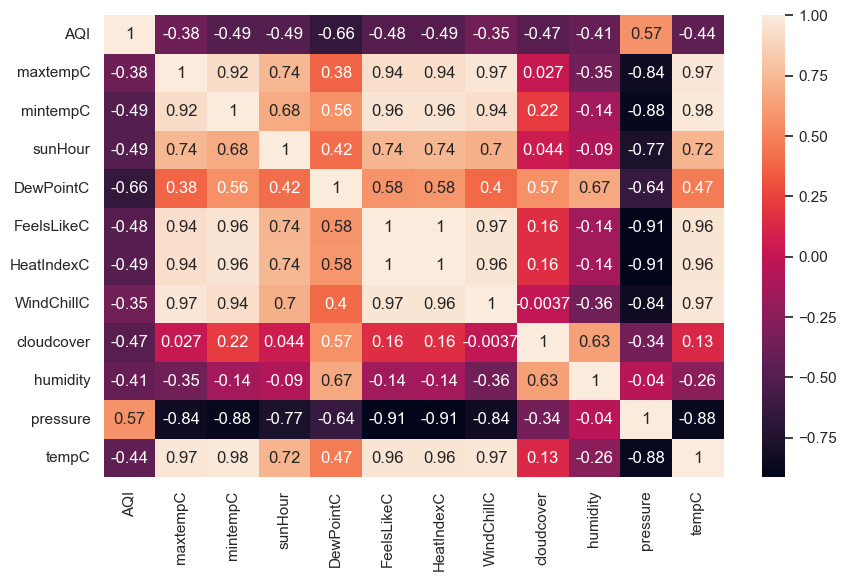

In [126]:
sns.heatmap(corr,annot=True)

In [65]:
PollRel.iloc[:,1:].describe()

AQI     maxtempC     mintempC      sunHour    DewPointC  \
count  1826.000000  1826.000000  1826.000000  1826.000000  1826.000000   
mean    267.174659    33.154436    23.292442    11.138128    11.548923   
std     118.475038     7.207319     7.922634     2.168306     7.930108   
min      29.000000    15.000000     5.000000     4.602624    -6.750000   
25%     174.000000    27.000000    16.000000     8.700000     5.677083   
50%     267.329295    35.000000    25.000000    11.600000    10.375000   
75%     352.000000    38.000000    30.000000    13.200000    19.114583   
max     624.272351    52.000000    43.000000    14.000000    25.708333   

        FeelsLikeC   HeatIndexC   WindChillC   cloudcover     humidity  \
count  1826.000000  1826.000000  1826.000000  1826.000000  1826.000000   
mean     31.273092    31.348257    29.988157    15.571613    37.077141   
std       8.662043     8.566974     7.447768    17.925100    16.633009   
min      11.250000    12.083333    11.250000     0.000000     4.708333   
25%      23.666667    24.010417    24.000000     1.260417    24.177083   
50%      33.020833    33.020833    31.791667     7.645833    34.875000   
75%      38.458333    38.458333    35.333333    26.010417    49.947917   
max      51.208333    51.208333    46.750000    70.656779    86.983886   

          pressure        tempC  weather_stability    t_h_ratio  Air_Dryness  \
count  1826.000000  1826.000000        1826.000000  1826.000000  1826.000000   
mean   1007.213582    27.875799           4.891619     1.238577     2.117652   
std       7.653245     7.800981           6.776455     1.064603     1.836682   
min     988.958333     9.583333         -16.487500     0.212181     0.000000   
25%    1000.333333    21.218750           0.265625     0.623377     0.677083   
50%    1007.020833    30.000000           4.368750     0.872728     1.708333   
75%    1014.125000    33.625000           9.668750     1.446925     3.500000   
max    1022.791667    46.750000          21.312500     9.557522    24.416667   

              conn        conn2  
count  1826.000000  1826.000000  
mean    844.704234   135.781029  
std     488.410451   104.214019  
min     160.083333   -80.504167  
25%     460.968750    55.500636  
50%     691.208333   107.745833  
75%    1173.656250   229.842708  
max    2219.625000   355.608333

In [66]:
PollRel

Dates    AQI  maxtempC  mintempC   sunHour  DewPointC  FeelsLikeC  \
0    2015-01-01  472.0      23.0      11.0  8.700000   1.833333   16.333333   
1    2015-01-02  454.0      15.0      10.0  4.602624   6.708333   12.958333   
2    2015-01-03  143.0      18.0      12.0  8.700000  12.041667   15.083333   
3    2015-01-04  319.0      21.0      10.0  8.700000   8.208333   16.375000   
4    2015-01-05  325.0      21.0       8.0  8.700000   4.875000   14.916667   
...         ...    ...       ...       ...       ...        ...         ...   
1821 2019-12-27  372.0      22.0      15.0  8.700000  -0.208333   18.708333   
1822 2019-12-28  425.0      22.0      13.0  8.700000   0.666667   18.583333   
1823 2019-12-29  455.0      19.0      14.0  8.700000  -1.791667   16.750000   
1824 2019-12-30  506.0      20.0      14.0  7.100000  -0.250000   16.625000   
1825 2019-12-31  417.0      17.0      10.0  7.100000  -3.208333   13.875000   

      HeatIndexC  WindChillC  cloudcover   humidity     pressure      tempC  \
0      16.458333   16.375000   13.291667  38.875000  1017.125000  14.958333   
1      13.541667   12.958333   62.375000  66.333333  1019.250000  12.791667   
2      14.958333   15.083333   41.375000  83.500000  1018.375000  13.833333   
3      17.291667   16.375000    0.500000  59.208333  1019.250000  13.416667   
4      16.291667   14.916667    0.416667  49.916667  1016.125000  13.291667   
...          ...         ...         ...        ...          ...        ...   
1821   18.708333   18.708333    0.000000  28.500000  1017.208333  18.625000   
1822   18.583333   18.583333    0.000000  30.708333  1018.625000  18.583333   
1823   17.000000   16.750000    2.583333  28.291667  1019.000000  16.750000   
1824   16.875000   16.625000   14.041667  31.625000  1018.083333  16.625000   
1825   14.416667   13.875000   22.916667  30.083333  1019.083333  14.208333   

      weather_stability  t_h_ratio  Air_Dryness         conn       conn2  
0               -0.7000   0.591640     1.416667   427.625000   15.950000  
1              -10.9250   0.226131     0.166667   663.333333   30.875937  
2              -16.4875   0.215569     1.250000  1002.000000  104.762500  
3               -5.6375   0.354680     2.958333   592.083333   71.412500  
4               -1.8625   0.420701     1.625000   399.333333   42.412500  
...                 ...        ...          ...          ...         ...  
1821             2.1250   0.771930     0.083333   427.500000   -1.812500  
1822             1.0375   0.716418     0.000000   399.208333    5.800000  
1823             0.1000   0.671576     0.000000   396.083333  -15.587500  
1824             0.3625   0.632411     0.000000   442.750000   -1.775000  
1825             0.1375   0.565097     0.333333   300.833333  -22.779167  

[1826 rows x 18 columns]

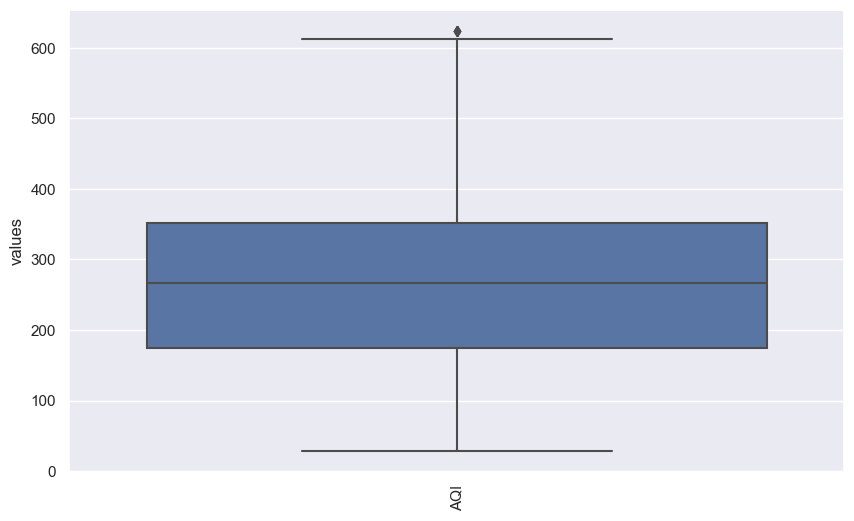

In [67]:
sns.boxplot(data=PollRel[['AQI']])
plt.xticks(rotation=90)
plt.ylabel('values')
plt.show()

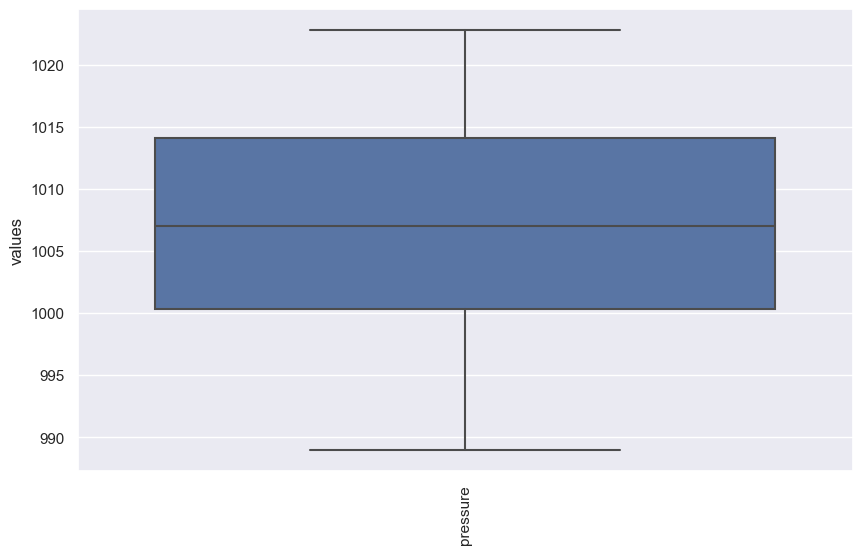

In [68]:
sns.boxplot(data=PollRel[['pressure']])
plt.xticks(rotation=90)
plt.ylabel('values')
plt.show()

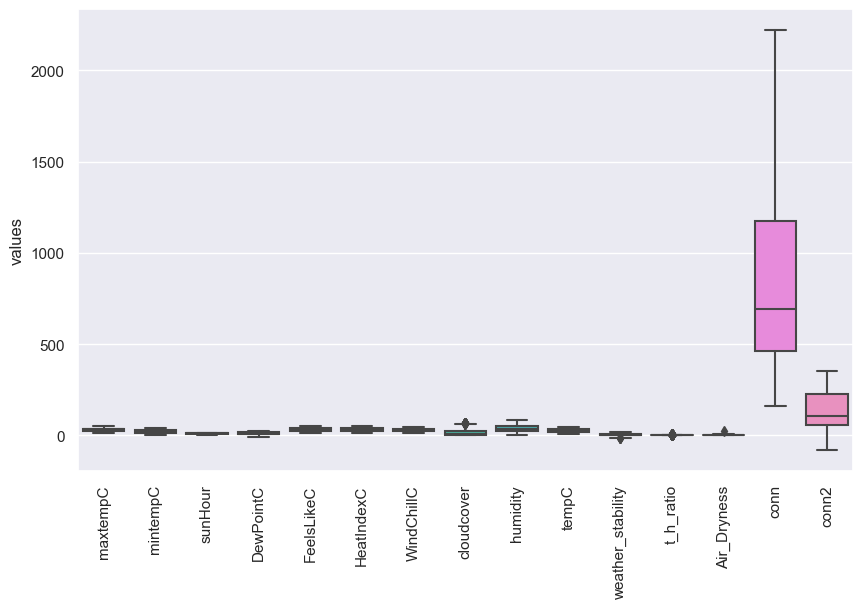

In [69]:
sns.boxplot(data=PollRel.drop(['pressure','AQI'],axis=1))
plt.xticks(rotation=90)
plt.ylabel('values')
plt.show()

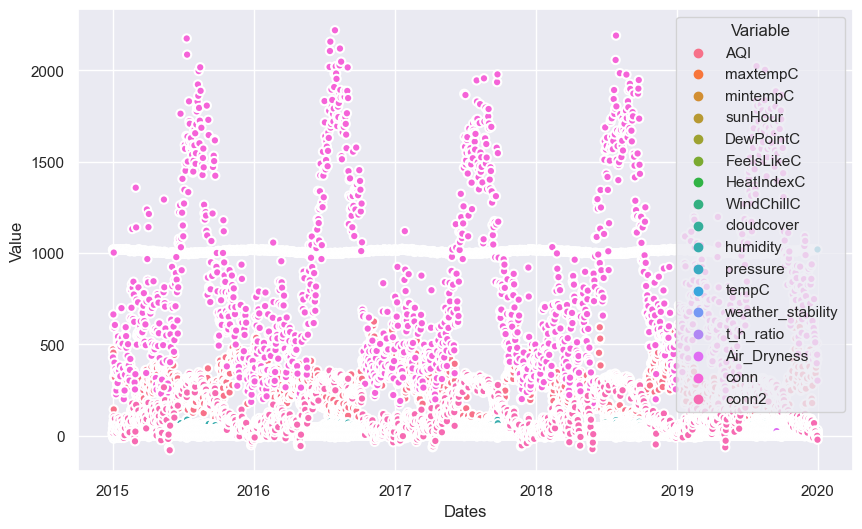

In [70]:
cols= PollRel.iloc[:,1:].columns
PollRel_melted = PollRel.melt(id_vars='Dates', value_vars=cols, var_name='Variable', value_name='Value')
sns.scatterplot(data=PollRel_melted,x='Dates',y='Value',hue='Variable', markers=True, linewidth=1.5)
plt.show()

In [71]:
PollRel.iloc[:,2:].columns

Index(['maxtempC', 'mintempC', 'sunHour', 'DewPointC', 'FeelsLikeC',
       'HeatIndexC', 'WindChillC', 'cloudcover', 'humidity', 'pressure',
       'tempC', 'weather_stability', 't_h_ratio', 'Air_Dryness', 'conn',
       'conn2'],
      dtype='object')

# MODELLING

In [72]:
fitness={'R2':[],'Rmse':[]}

In [73]:
X=PollRel[PollRel.iloc[:,2:].columns]
y=PollRel['AQI']
X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,train_size=0.8,random_state=42)
scaling=preprocessing.MinMaxScaler()
X_train_s=scaling.fit_transform(X_train)
X_train_n=preprocessing.normalize(X_train,norm='l2')
X_train_sn=preprocessing.normalize(X_train_s,norm='l2')
X_test_s=scaling.fit_transform(X_test)
X_test_n=preprocessing.normalize(X_test,norm='l2')
X_test_sn=preprocessing.normalize(X_test_s,norm='l2')

# LINEAR REGRESSION

In [74]:
model=LinearRegression()
model.fit(X_train_n,y_train)
prediction=model.predict(X_test_n)
r2=r2_score(y_test,prediction)
rmse=mean_squared_error(y_test,prediction,squared=False)
fitness['R2'].append(r2)
fitness['Rmse'].append(rmse)
print(r2,rmse)

0.5205531916289101 81.88691299200327


In [75]:
print(model.coef_) 
print(model.intercept_) 

[ 8.43074691e+01 -8.64752267e+03 -4.12314995e+04 -1.28341160e+04
 -4.50276718e+03 -3.67218728e+03  1.49133030e+05 -5.06011688e+02
 -2.41612360e+03  1.15520087e+03 -1.35668851e+05 -5.24658692e+03
  4.83790285e+04 -1.38554058e+05  3.06488178e+02  1.67197825e+03]
-423.49710666002613


In [76]:
coefficients = model.coef_ 
intercept = model.intercept_ 
def calculate_aqi(HeatIndexC,FeelsLikeC,DewPointC,cloudcover,pressure,sunHour,mintempC): 
    return (HeatIndexC * coefficients[0]) + (FeelsLikeC * coefficients[1]) + (DewPointC * coefficients[2])+(cloudcover * coefficients[3])+(pressure * coefficients[4]) + (sunHour * coefficients[5]) + (mintempC * coefficients[6]) + intercept 


In [77]:
X_train.shape

(1460, 16)

In [78]:
PollRel.iloc[1800]

Dates                2019-12-06 00:00:00
AQI                                423.0
maxtempC                            26.0
mintempC                            22.0
sunHour                              8.7
DewPointC                       7.958333
FeelsLikeC                        23.625
HeatIndexC                     24.208333
WindChillC                     23.083333
cloudcover                         7.125
humidity                            37.5
pressure                     1019.291667
tempC                          23.083333
weather_stability                 0.4625
t_h_ratio                       0.693333
Air_Dryness                          0.0
conn                               825.0
conn2                            69.2375
Name: 1800, dtype: object

In [79]:
print(calculate_aqi(24.21,23.63,7.96,7.13,1019.29,8.7,22.0))

-1963080.2769516788


# DECISION TREE REGRESSION

In [80]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

In [81]:
model.fit(X_train,y_train)
prediction=model.predict(X_test)
r2=r2_score(y_test,prediction)
rmse=mean_squared_error(y_test,prediction,squared=False)
print(r2,rmse)

0.30296397340987025 98.73517401504564


In [82]:
fitness['R2'].append(r2)
fitness['Rmse'].append(rmse)

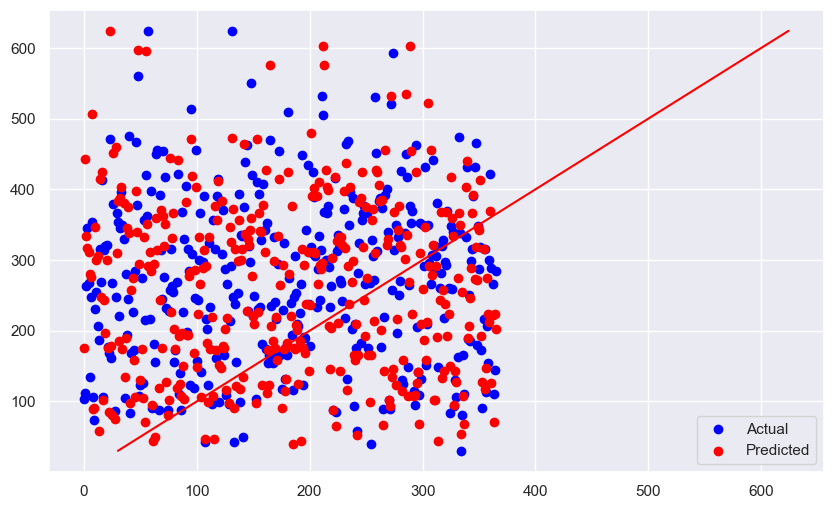

<Axes: ylabel='AQI'>

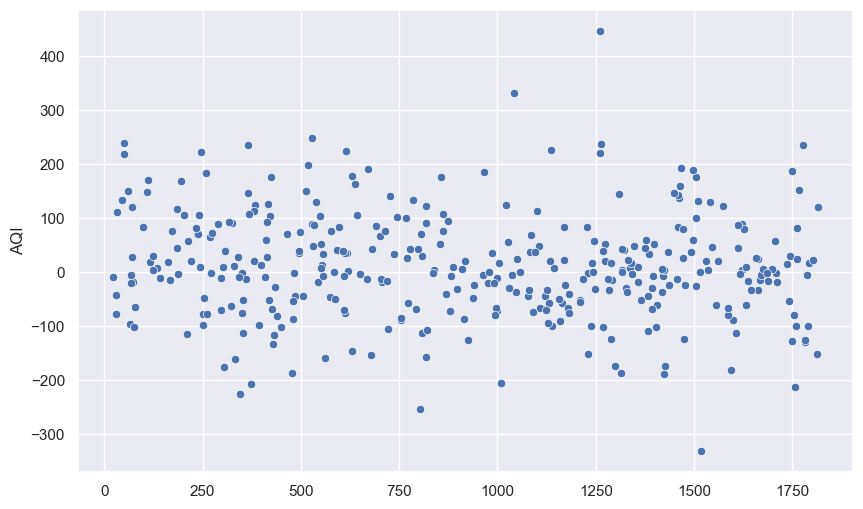

In [83]:
actual_values = y_test
indices = range(len(actual_values))
plt.scatter(indices, actual_values, color='blue', label='Actual')
plt.scatter(indices, prediction, color='red', label='Predicted')
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='red')
plt.legend()
plt.show()
diff=actual_values-prediction
sns.scatterplot(diff)

In [84]:
reg=pd.DataFrame([actual_values.values,prediction]).T

In [85]:
reg.columns=['actual','predicted']

<Axes: xlabel='actual', ylabel='predicted'>

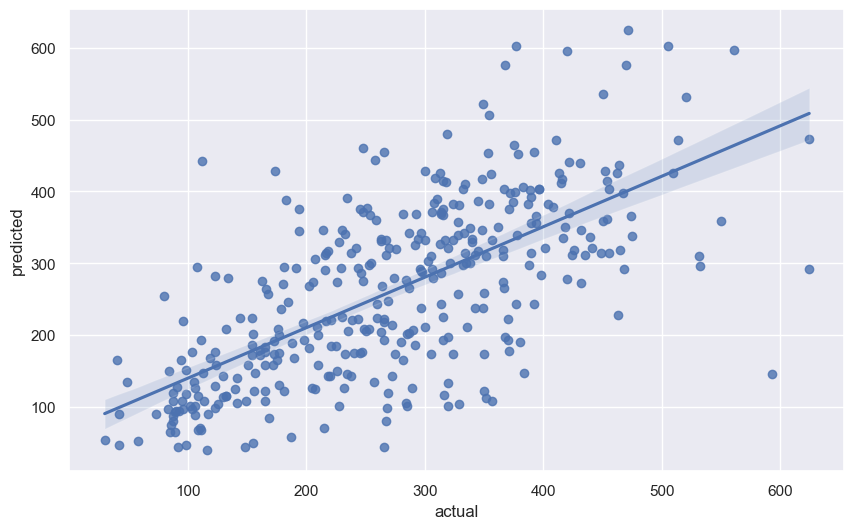

In [86]:
sns.regplot(data=reg,x='actual',y='predicted')

# RANDOM FOREST REGRESSOR

In [87]:
from sklearn.ensemble import RandomForestRegressor
X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,train_size=0.8,random_state=42)
model = RandomForestRegressor(n_estimators= 1000, min_samples_split= 2, min_samples_leaf= 1, max_features= 'log2', 
                              max_depth= 20, bootstrap= True)
# max depth=3= less val..n estimator increases with time but gives gud val..large min sample gives less score..

In [88]:
#define random grid
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 10)]
max_depth = [int(x) for x in np.linspace(5, 50, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,'max_depth': max_depth,
               'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}

In [89]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 25, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 9, 14, 18, 23, 27, 32,
                                                      36, 41, 45, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 66, 83, 100, 116,
                                                         133, 150, 166, 183,
                                                         200]},
                   random_state=42, verbose=2)

In [90]:
best_params = rf_random.best_params_
best_score = rf_random.best_score_

In [91]:
print(best_params,best_score)
#came in 200 prvs time

{'n_estimators': 116, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 27, 'bootstrap': True} 0.6540957036366761


In [92]:
model = RandomForestRegressor(n_estimators= 83, min_samples_split= 5, min_samples_leaf= 4,  max_depth= 23, bootstrap= True)
# max depth=3= less val..n estimator increases with time but gives gud val..large min sample gives less score..

In [93]:
model.fit(X_train,y_train)
prediction=model.predict(X_test)
r2=r2_score(y_test,prediction)
rmse=mean_squared_error(y_test,prediction,squared=False)
print(r2,rmse)

0.6180195379555324 73.09116061399745


In [94]:
fitness['R2'].append(r2)
fitness['Rmse'].append(rmse)

<Axes: xlabel='actual', ylabel='predicted'>

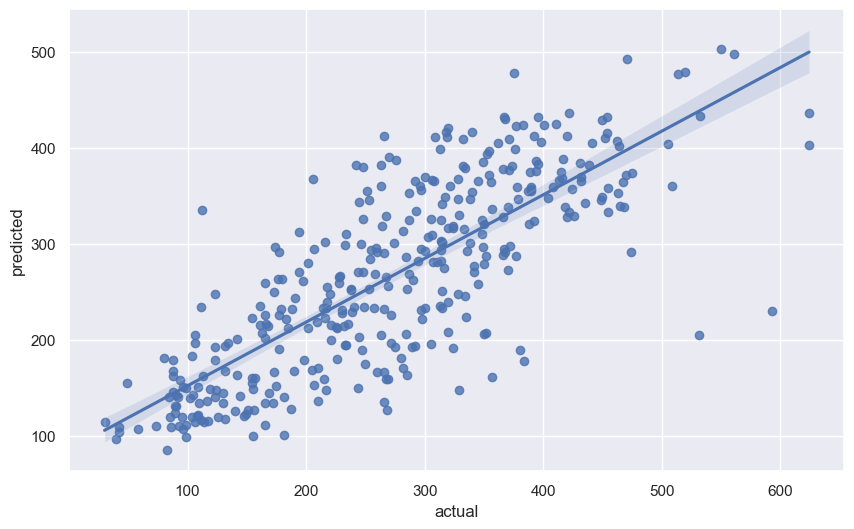

In [95]:
reg=pd.DataFrame([actual_values.values,prediction]).T
reg.columns=['actual','predicted']
sns.regplot(data=reg,x='actual',y='predicted')

In [96]:
model.feature_importances_

array([0.01389368, 0.01174773, 0.14293717, 0.058991  , 0.01241676,
       0.0157308 , 0.01867909, 0.02599071, 0.01438924, 0.03462821,
       0.02147879, 0.02768224, 0.02228909, 0.04162981, 0.34169615,
       0.19581952])

In [97]:
df=pd.DataFrame(model.feature_importances_)
df.shape
df['feature_names']=X_train.columns
df

0      feature_names
0   0.013894           maxtempC
1   0.011748           mintempC
2   0.142937            sunHour
3   0.058991          DewPointC
4   0.012417         FeelsLikeC
5   0.015731         HeatIndexC
6   0.018679         WindChillC
7   0.025991         cloudcover
8   0.014389           humidity
9   0.034628           pressure
10  0.021479              tempC
11  0.027682  weather_stability
12  0.022289          t_h_ratio
13  0.041630        Air_Dryness
14  0.341696               conn
15  0.195820              conn2

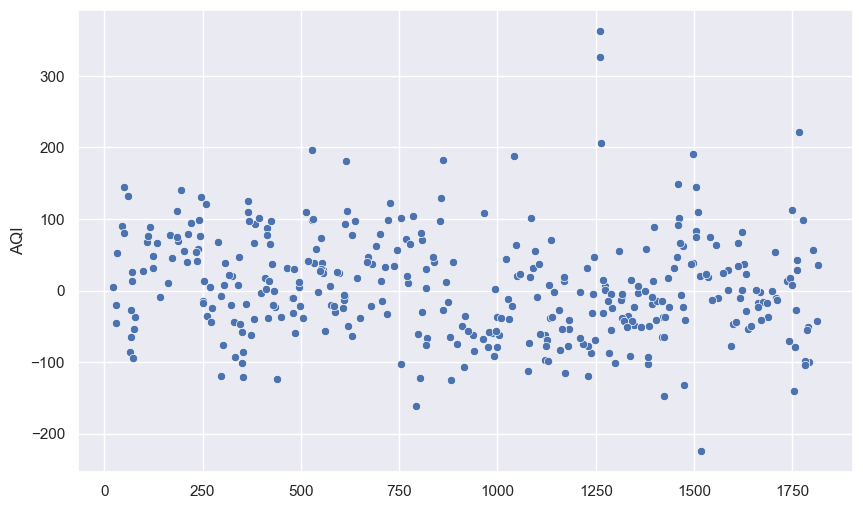

In [98]:
actual_values=y_test
diff=actual_values-prediction
sns.scatterplot(diff)
plt.show()

# SUPPORT VECTOR REGRESSOR

In [99]:
from sklearn.svm import SVR
model = SVR()

In [100]:
model.fit(X_train_sn,y_train)
prediction=model.predict(X_test_sn)
r2=r2_score(y_test,prediction)
rmse=mean_squared_error(y_test,prediction,squared=False)
print(r2,rmse)

0.43022048754655806 89.26838912660486


In [101]:
fitness['R2'].append(r2)
fitness['Rmse'].append(rmse)

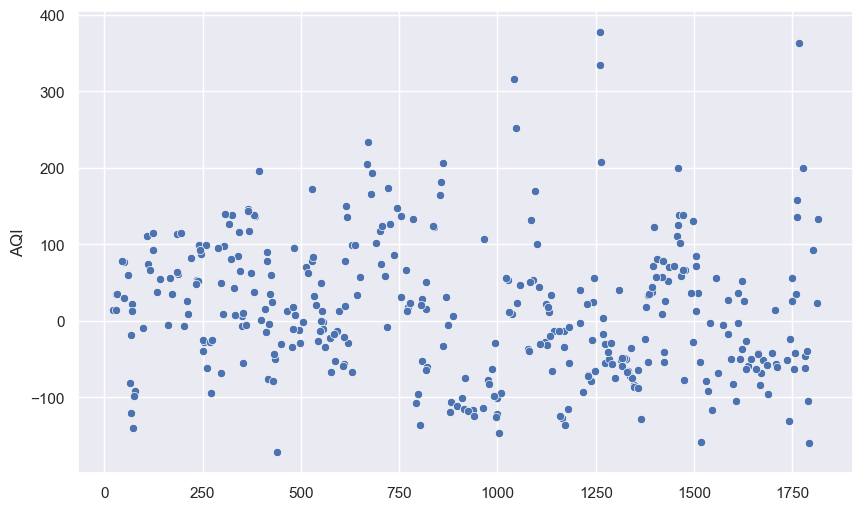

In [102]:
actual_values=y_test
diff=actual_values-prediction
sns.scatterplot(diff)
plt.show()

# KNN REGRESSION

In [103]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()

In [104]:
model.fit(X_train_sn,y_train)
prediction=model.predict(X_test_sn)
r2=r2_score(y_test,prediction)
rmse=mean_squared_error(y_test,prediction,squared=False)
print(r2,rmse)

0.5331029398811338 80.80809206905663


In [105]:
fitness['R2'].append(r2)
fitness['Rmse'].append(rmse)

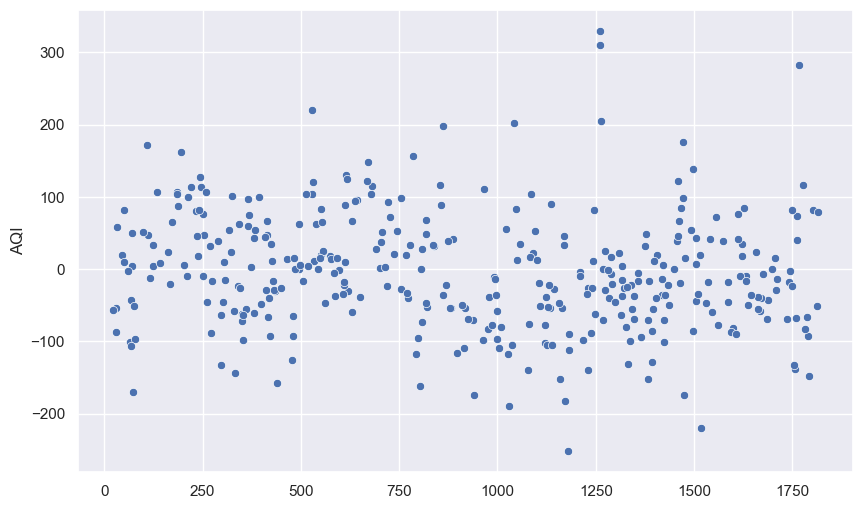

In [106]:
actual_values=y_test
diff=actual_values-prediction
sns.scatterplot(diff)
plt.show()

# GRADIENT BOOSTING

In [107]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor()

In [108]:
model.fit(X_train_n,y_train)
prediction=model.predict(X_test_n)
r2=r2_score(y_test,prediction)
rmse=mean_squared_error(y_test,prediction,squared=False)
print(r2,rmse)

0.5569927141362794 78.71358951955555


In [109]:
fitness['R2'].append(r2)
fitness['Rmse'].append(rmse)

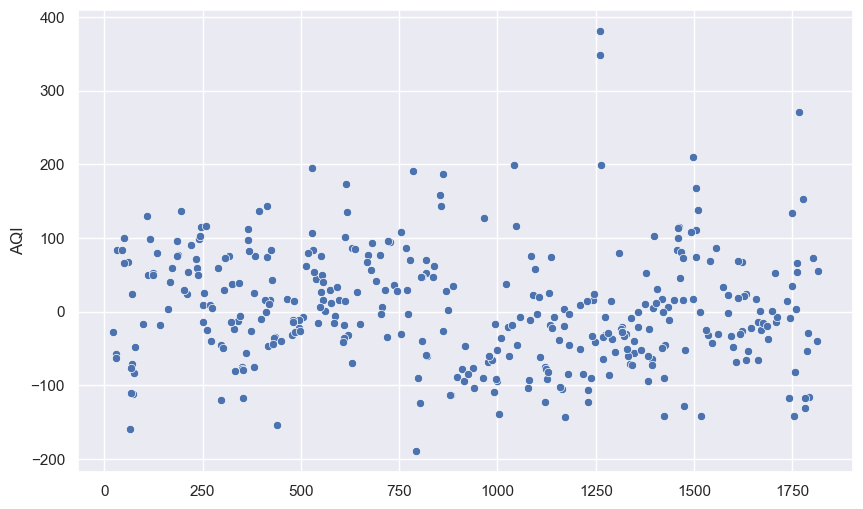

In [110]:
actual_values=y_test
diff=actual_values-prediction
sns.scatterplot(diff)
plt.show()

# XG BOOST

In [111]:
import xgboost as xgb
model=xgb.XGBRegressor()

In [112]:
model.fit(X_train_n,y_train)
prediction=model.predict(X_test_n)
r2=r2_score(y_test,prediction)
rmse=mean_squared_error(y_test,prediction,squared=False)
print(r2,rmse)

0.5071112168639512 83.02688620226591


In [113]:
fitness['R2'].append(r2)
fitness['Rmse'].append(rmse)

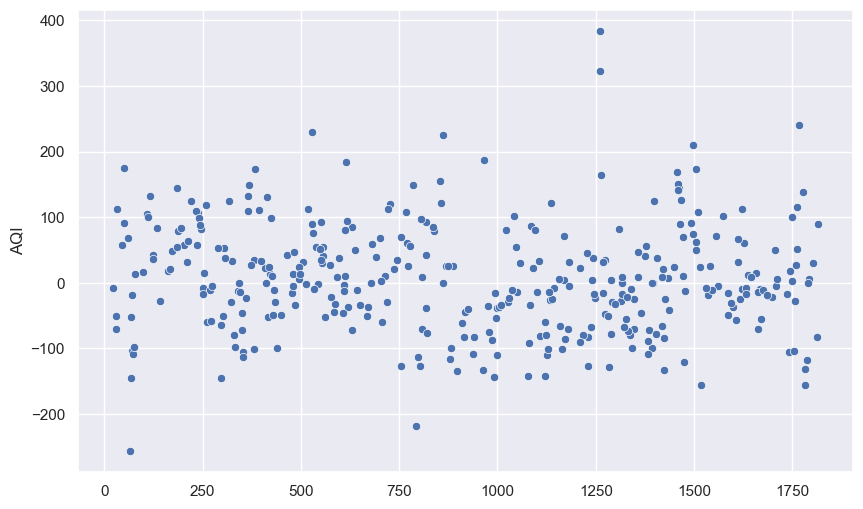

In [114]:
actual_values=y_test
diff=actual_values-prediction
sns.scatterplot(diff)
plt.show()

# R2 & RMSE COMPARISON

In [115]:
fitness=pd.DataFrame(fitness)
fitness

R2       Rmse
0  0.520553  81.886913
1  0.302964  98.735174
2  0.618020  73.091161
3  0.430220  89.268389
4  0.533103  80.808092
5  0.556993  78.713590
6  0.507111  83.026886

In [116]:
fitness['cols']=['Linear','Decision Tree','Random Forest','SVM','KNN','Gradient Boosting','XG Boost']

In [117]:
fitness.set_index('cols',inplace=True)
fitness

R2       Rmse
cols                                  
Linear             0.520553  81.886913
Decision Tree      0.302964  98.735174
Random Forest      0.618020  73.091161
SVM                0.430220  89.268389
KNN                0.533103  80.808092
Gradient Boosting  0.556993  78.713590
XG Boost           0.507111  83.026886

In [118]:
fitness.rename_axis(None, axis='index', inplace=True)

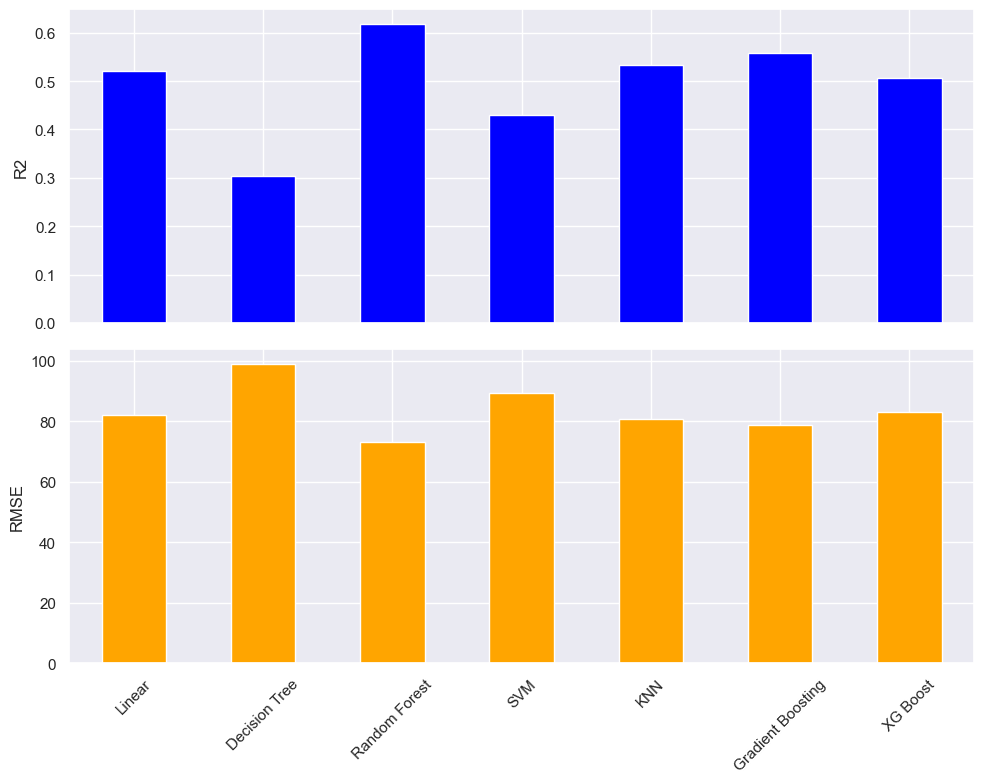

In [119]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
fitness['R2'].plot(kind='bar', ax=ax1, color='blue')
ax1.set_ylabel('R2')
fitness['Rmse'].plot(kind='bar', ax=ax2, color='orange')
ax2.set_ylabel('RMSE')
plt.xticks(range(len(fitness.index)), fitness.index, rotation=45)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.show()

In [120]:
diff = fitness.diff()
diff.columns = ['R2 Diff', 'RMSE Diff']

In [121]:
diff

R2 Diff  RMSE Diff
Linear                  NaN        NaN
Decision Tree     -0.217589  16.848261
Random Forest      0.315056 -25.644013
SVM               -0.187799  16.177229
KNN                0.102882  -8.460297
Gradient Boosting  0.023890  -2.094503
XG Boost          -0.049881   4.313297

In [122]:
ratio = fitness / fitness.shift(1)
ratio.columns = ['R2 Ratio', 'RMSE Ratio']
print(ratio)

                   R2 Ratio  RMSE Ratio
Linear                  NaN         NaN
Decision Tree      0.582004    1.205750
Random Forest      2.039911    0.740275
SVM                0.696128    1.221329
KNN                1.239139    0.905226
Gradient Boosting  1.044813    0.974081
XG Boost           0.910445    1.054797
